<a href="https://colab.research.google.com/github/Sylar257/FastAI-Course-notes-interactive-notebook/blob/master/FastAI_DL2_course_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

model01 = drive.CreateFile({'id':'1HgAJKxLosoXgOrOX3bHsnsbz0W7UOh_P'})
model01.GetContentFile('nb_01.py')
model02 = drive.CreateFile({'id':'1Dst8o_GVEBrUKV-1ZdVzhPhWzI5m5YtC'})
model02.GetContentFile('nb_02.py')
model03 = drive.CreateFile({'id':'1QRI2ewvOdP6ipjHtZ4PISdF50tauszmG'})
model03.GetContentFile('nb_03.py')
model04 = drive.CreateFile({'id':'1S6-SYifqGCofX38GTapthiWwnUp7Gzbt'})
model04.GetContentFile('nb_04.py')
model05 = drive.CreateFile({'id':'18qkY2wCRYEpYyyJy_vPze4aB_zkW9Xb5'})
model05.GetContentFile('nb_05.py')
model05b = drive.CreateFile({'id':'1uta4wPUIdiyrciHfkOtGPggwdLLWjKaX'})
model05b.GetContentFile('nb_05b.py')
model06 = drive.CreateFile({'id':'1oEuLAW4f109htDfSQP3OdD30oiYj9Qjv'})
model06.GetContentFile('nb_06.py')
model07 = drive.CreateFile({'id':'1lc2117YrHCe3qVYiGj_ehvOUmeY9nAcx'})
model07.GetContentFile('nb_07.py')
model07a = drive.CreateFile({'id':'1uc9t4rYCGr813LSaDlyrVNSV-WLdd5z8'})
model07a.GetContentFile('nb_07a.py')
model08 = drive.CreateFile({'id':'1iV2uHOX9m_xuVDnwh-lTSBeDMeVHCapD'})
model08.GetContentFile('nb_08.py')
model09 = drive.CreateFile({'id':'1qbhABqKiINKixHn9QJ67sJHY3PNuNgRV'})
model09.GetContentFile('nb_09.py')
model09b = drive.CreateFile({'id':'1Mw6ydUGTIp7DrrHLYFO7UN8SbRS18zK1'})
model09b.GetContentFile('nb_09b.py')
model09c = drive.CreateFile({'id':'1fkS3Ex-zJvcd0rLCTZigZTLJp-quUj9y'})
model09c.GetContentFile('nb_09c.py')
model10 = drive.CreateFile({'id':'1prjih_jql5nWthxb5F_INZuGiWCb_gYO'})
model10.GetContentFile('nb_10.py')
model10b = drive.CreateFile({'id':'1R7wcaHJhXBwYiZY_qXwRvb9dfN37G3ys'})
model10b.GetContentFile('nb_10b.py')
model10c = drive.CreateFile({'id':'1TsekgG3_Tnylwm3kiZR89GDbifhayaCX'})
model10c.GetContentFile('nb_10c.py')
model11 = drive.CreateFile({'id':'1ws0xLMXxZPPbLZatKn_eiwg2wpVbvo62'})
model11.GetContentFile('nb_11.py')
model11a = drive.CreateFile({'id':'1osiIrm4uQ_cKtIC8Mbtk4r7CUQHuXRDe'})
model11a.GetContentFile('nb_11a.py')

In [0]:
# ad_ext autoreload
# %autoreload 2

%matplotlib inline

# 02-Fully connected

## Layer as classes

In [0]:
#export
from nb_01 import *


In [0]:
class Relu():
  def __call__(self, inp):
    self.inp = inp
    self.out - inp.clamp_min(0.)-0.5
    return self.out
  
  def backward(self): self.inp.g = (self.inp>0).float()*self.out.g

In [0]:
class Lin():
  def __init__(self, w, b): self.w, self.b = w, b

  def __call__(self, inp):
    self.inp = inp
    self.out = inp@self.w + self.b
    return self.out
  
  def backward(self):
    self.inp.g = self.out.g @ self.w.t()
    # Creating a giant outer product, just to sum it, is inefficient!
    self.w.g = (self,inp.unsqueese(-1)*self.out.g.unsqueeze(1)).sum(0)
    self.b.g = self.out.g.sum(0)

In [0]:
class Mse():
    def __call__(self, inp, targ):
        self.inp = inp
        self.targ = targ
        self.out = (inp.squeeze() - targ).pow(2).mean()
        return self.out
    
    def backward(self):
        self.inp.g = 2. * (self.inp.squeeze() - self.targ).unsqueeze(-1) / self.t

In [0]:
class Model():
  def __init__(self, w1, b1, w2, b2):
    self.layers = [Lin(w1,b1), Relu(), Lin(w2, b2)]
    self.loss = Mse()

  def __call__(self, x, targ):
    for l in self.layers: x = l(x)
    return self.loss(x, targ)

  def backward(self):
    self.loss.backward()
    for l in reversed(self.layers): l.backward()

## Module.forward()

In [0]:
class Module()

# 03-minibatch-training

In [0]:
from nb_02 import *
import torch.nn.functional as F

In [0]:
mpl.rcParams['image.cmap'] = 'gray'

In [0]:
x_train, y_train,x_valid, y_valid = get_data()

In [0]:
n, m = x_train.shape
c = y_train.max()+1
nh = 50

In [0]:
class Model(nn.Module):
  def __init__(self, n_in, nh, n_out):
    super().__init__()
    self.layers = [nn.Linear(n_in,nh), nn.ReLU(), nn.Linear(nh,n_out)]

  def __call__(self, x):
    for l in self.layers: x = l(x)
    return x


In [0]:
x_train.shape

torch.Size([50000, 784])

In [0]:
y_train

tensor([5, 0, 4,  ..., 8, 4, 8])

In [0]:
model = Model(m, nh,10)

In [0]:
pred = model(x_train)

In [0]:
def log_softmax(x): return (x.exp()/(x.exp().sum(-1,keepdim=True))).log()

In [0]:
sm_pred = log_softmax(pred)

In [0]:
y_train[:3]

tensor([5, 0, 4])

In [0]:
sm_pred[[1,2,3],[5,0,4]]

tensor([-2.2489, -2.2368, -2.2617], grad_fn=<IndexBackward>)

## Basic training loop

In [0]:
loss_func = F.cross_entropy

In [0]:
#export
def accuracy(out, yb): return (torch.argmax(out, dim=1)==yb).float().mean()

In [0]:
lr = 0.5   # learning rate
epochs = 1 # how many epochs to train for
bs=64 

for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
#         set_trace()
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        loss = loss_func(model(xb), yb)

        loss.backward()
        with torch.no_grad():
            for l in model.layers:
                if hasattr(l, 'weight'):
                    l.weight -= l.weight.grad * lr
                    l.bias   -= l.bias.grad   * lr
                    l.weight.grad.zero_()
                    l.bias  .grad.zero_()

In [0]:
loss_func(model(xb), yb), accuracy(model(xb), yb)

(tensor(0.0566, grad_fn=<NllLossBackward>), tensor(1.))

# 04-Callbacks

## A very brief overview

Here is the vanilla training loop without callbacks

In [0]:
def train(train_dl, model, epoch, opt, loss_func):
  for _ in range(epoch):
    model.train()
    for xb, yb in train_dl:
      out = model(xb)
      loss = loss_func(out, yb)
      loss.backward()
      opt.step()
      opt.zero_grad()

Here a version with callbacks implemented

In [0]:
def train(learn, epochs, callbacks, metrics):
  cb_handler = CallbackHandler(callbacks)     # create CallbackHandler
  cb_handler.on_train_begin(epochs, learn, metrics) # excute callbacks before training begin
  for epoch in range(epochs):
    learn.model.train()
    cb_handler.on_epoch_begin(epoch)  # excute callbacks when an epoch starts
    for xb, yb in learn.data.train_dl:
      xb, yb = cb_handler.on_batch_begin(xb, yb) # excute callbacks when a batch starts
      out = learn.model(xb)
      out = cb_handler.on_loss_begin(out) # excute callbacks before computing loss function
      loss = leran.loss_func(out, yb)
      loss, skip_backward = callbacks.on_loss_begin(loss) # excute callbacks after computing loss
      if not skip_backward: loss.backward()
      if not cb_handler.on_step_begin(): learn.opt.step()     # use callbacks for conditioning
      if not cb_handler.on_step_end(): learn.opt.zero_grad()  # use callbacks for conditioning
      if not callbacks.on_batch_end(): break                  # use callbacks for conditioning
    val_loss, mets = validate(learn.data.valid_dl, model, metrics)
    if not callbacks.on_epoch_end(val_loss, mets): break
  callbacks.on_train_end()    # excute callbacks after finishing a training

## Experiments with Callbacks

### DataBunch/Learner

In [0]:
#export
from nb_03 import *

In [0]:
x_train,y_train,x_valid,y_valid = get_data()
train_ds,valid_ds = Dataset(x_train, y_train),Dataset(x_valid, y_valid)
nh,bs = 50,64
c = y_train.max().item()+1
loss_func = F.cross_entropy

In [0]:
#export
class DataBunch():
    def __init__(self, train_dl, valid_dl, c=None):
        self.train_dl,self.valid_dl,self.c = train_dl,valid_dl,c
        
    @property
    def train_ds(self): return self.train_dl.dataset
        
    @property
    def valid_ds(self): return self.valid_dl.dataset

In [0]:
data = DataBunch(*get_dls(train_ds, valid_ds, bs), c)

In [0]:
#export
def get_model(data, lr=0.5, nh=50):
    m = data.train_ds.x.shape[1]
    model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,data.c))
    return model, optim.SGD(model.parameters(), lr=lr)

class Learner():
    def __init__(self, model, opt, loss_func, data):
        self.model,self.opt,self.loss_func,self.data = model,opt,loss_func,data

In [0]:
learn = Learner(*get_model(data), loss_func, data)

In [0]:
def fit(epochs, learn):
    for epoch in range(epochs):
        learn.model.train()
        for xb,yb in learn.data.train_dl:
            loss = learn.loss_func(learn.model(xb), yb)
            loss.backward()
            learn.opt.step()
            learn.opt.zero_grad()

        learn.model.eval()
        with torch.no_grad():
            tot_loss,tot_acc = 0.,0.
            for xb,yb in learn.data.valid_dl:
                pred = learn.model(xb)
                tot_loss += learn.loss_func(pred, yb)
                tot_acc  += accuracy (pred,yb)
        nv = len(learn.data.valid_dl)
        print(epoch, tot_loss/nv, tot_acc/nv)
    return tot_loss/nv, tot_acc/nv

In [0]:
loss,acc = fit(1, learn)

0 tensor(0.1573) tensor(0.9510)


### CallbackHandler

In [0]:
def one_batch(xb, yb, cb):
    if not cb.begin_batch(xb,yb): return
    loss = cb.learn.loss_func(cb.learn.model(xb), yb)
    if not cb.after_loss(loss): return
    loss.backward()
    if cb.after_backward(): cb.learn.opt.step()
    if cb.after_step(): cb.learn.opt.zero_grad()

def all_batches(dl, cb):
    for xb,yb in dl:
        one_batch(xb, yb, cb)
        if cb.do_stop(): return

def fit(epochs, learn, cb):
    if not cb.begin_fit(learn): return
    for epoch in range(epochs):
        if not cb.begin_epoch(epoch): continue
        all_batches(learn.data.train_dl, cb)
        
        if cb.begin_validate():
            with torch.no_grad(): all_batches(learn.data.valid_dl, cb)
        if cb.do_stop() or not cb.after_epoch(): break
    cb.after_fit()

In [0]:
class Callback():
    def begin_fit(self, learn):
        self.learn = learn
        return True
    def after_fit(self): return True
    def begin_epoch(self, epoch):
        self.epoch=epoch
        return True
    def begin_validate(self): return True
    def after_epoch(self): return True
    def begin_batch(self, xb, yb):
        self.xb,self.yb = xb,yb
        return True
    def after_loss(self, loss):
        self.loss = loss
        return True
    def after_backward(self): return True
    def after_step(self): return True

In [0]:
# res stores the signal to tell us if we have received a "false" to stop
class CallbackHandler():
    def __init__(self,cbs=None):
        self.cbs = cbs if cbs else []

    def begin_fit(self, learn):
        self.learn,self.in_train = learn,True
        learn.stop = False
        res = True
        for cb in self.cbs: res = res and cb.begin_fit(learn)
        return res

    def after_fit(self):
        res = not self.in_train
        for cb in self.cbs: res = res and cb.after_fit()
        return res
    
    def begin_epoch(self, epoch):
        self.learn.model.train()
        self.in_train=True
        res = True
        for cb in self.cbs: res = res and cb.begin_epoch(epoch)
        return res

    def begin_validate(self):
        self.learn.model.eval()
        self.in_train=False
        res = True
        for cb in self.cbs: res = res and cb.begin_validate()
        return res

    def after_epoch(self):
        res = True
        for cb in self.cbs: res = res and cb.after_epoch()
        return res
    
    def begin_batch(self, xb, yb):
        res = True
        for cb in self.cbs: res = res and cb.begin_batch(xb, yb)
        return res

    def after_loss(self, loss):
        res = self.in_train
        for cb in self.cbs: res = res and cb.after_loss(loss)
        return res

    def after_backward(self):
        res = True
        for cb in self.cbs: res = res and cb.after_backward()
        return res

    def after_step(self):
        res = True
        for cb in self.cbs: res = res and cb.after_step()
        return res
    
    def do_stop(self):
        try:     return self.learn.stop
        finally: self.learn.stop = False

### Now, an example of how to create a simple Callback

In [0]:
class TestCallback(Callback):
    def begin_fit(self,learn):
        super().begin_fit(learn)
        self.n_iters = 0
        return True
        
    def after_step(self):
        self.n_iters += 1
        print(self.n_iters)
        if self.n_iters>=10: self.learn.stop = True
        return True

In [0]:
fit(1, learn, cb=CallbackHandler([TestCallback]))

TypeError: ignored

In [0]:
import re

_camel_re1 = re.compile('(.)([A-Z][a-z]+)')
_camel_re2 = re.compile('([a-z0-9])([A-Z])')
def camel2snake(name):
    s1 = re.sub(_camel_re1, r'\1_\2', name)
    return re.sub(_camel_re2, r'\1_\2', s1).lower()

class Callback():
  _order=0
  def set_runner(self, run): self.run = run
  def __getattr__(self, k): return getattr(self.run, k)
  @property
  def name(self):
    name = re.sub(r'Callback$', '', self.__class__, __name__)
    return camel2snake(name or 'callback')

This first callback(below) is responsible to switch the model back and forth in training or validation mode, as well as maintaining a count of the iteration, or the percentage of iteration ellapsed in the epoch.

In [0]:
class TrainEvalCallback(Callback):
  def begin_fit(self):
    self.run.n_epochs = 0.
    self.run.n_iter = 0

  def after_batch(self):
    if not self.in_train: return
    self.run.n_epochs += 1./self.iters
    self.run.n_iter += 1

  def begin_epoch(self):
    self.run.n_epochs = self.epoch
    self.model.train()
    self.run.in_train=True

  def begin_validate(self):
    self.model.eval()
    self.run.in_train=False

Now, re-create our TestCallback

In [0]:
class TestCallback(Callback):
  def after_step(self):
    if self.train_eval.n_iter>=10: return True

In [0]:
cbname = 'TrainEvelCallback'
camel2snake(cbname)

'train_evel_callback'

In [0]:
from typing import *

def listify(o):
  if o is None: return []
  if isinstance(o, list): return o
  if isinstance(o,str): return [o]
  if isinstance(o, Iterable): return list(o)
  return [o]

In [0]:
class Runner():
  def __init__(self, cbs=None, cb_funcs=None):
    cbs = listify(cbs)
    for cbf in listify(cb_funcs):
      cb = cbf()
      setattr(self, cb.name, cb)
      cbs.append(cb)
    self.stop, self.cbs = False, [TrainEvalCallback()]+cbs

  @property
  def opt(self):       return self.learn.opt
  @property
  def model(self):     return self.learn.model
  @property
  def loss_func(self): return self.learn.loss_func
  @property
  def data(self):      return self.learn.data

  def one_batch(self, xb, yb):
      self.xb,self.yb = xb,yb
      if self('begin_batch'): return
      self.pred = self.model(self.xb)
      if self('after_pred'): return
      self.loss = self.loss_func(self.pred, self.yb)
      if self('after_loss') or not self.in_train: return
      self.loss.backward()
      if self('after_backward'): return
      self.opt.step()
      if self('after_step'): return
      self.opt.zero_grad()

  def all_batches(self, dl):
      self.iters = len(dl)
      for xb,yb in dl:
          if self.stop: break
          self.one_batch(xb, yb)
          self('after_batch')
      self.stop=False

  def fit(self, epochs, learn):
      self.epochs,self.learn = epochs,learn

      try:
          for cb in self.cbs: cb.set_runner(self)
          if self('begin_fit'): return
          for epoch in range(epochs):
              self.epoch = epoch
              if not self('begin_epoch'): self.all_batches(self.data.train_dl)

              with torch.no_grad(): 
                  if not self('begin_validate'): self.all_batches(self.data.valid_dl)
              if self('after_epoch'): break
          
      finally:
          self('after_fit')
          self.learn = None

  def __call__(self, cb_name):
      for cb in sorted(self.cbs, key=lambda x: x._order):
          f = getattr(cb, cb_name, None)
          if f and f(): return True
      return False

Third callback: how to compute metrics.

In [0]:
class AvgStats():
    def __init__(self, metrics, in_train): self.metrics,self.in_train = listify(metrics),in_train
    
    def reset(self):
        self.tot_loss,self.count = 0.,0
        self.tot_mets = [0.] * len(self.metrics)
        
    @property
    def all_stats(self): return [self.tot_loss.item()] + self.tot_mets
    @property
    def avg_stats(self): return [o/self.count for o in self.all_stats]
    
    def __repr__(self):
        if not self.count: return ""
        return f"{'train' if self.in_train else 'valid'}: {self.avg_stats}"

    def accumulate(self, run):
        bn = run.xb.shape[0]
        self.tot_loss += run.loss * bn
        self.count += bn
        for i,m in enumerate(self.metrics):
            self.tot_mets[i] += m(run.pred, run.yb) * bn

class AvgStatsCallback(Callback):
    def __init__(self, metrics):
        self.train_stats,self.valid_stats = AvgStats(metrics,True),AvgStats(metrics,False)
        
    def begin_epoch(self):
        self.train_stats.reset()
        self.valid_stats.reset()
        
    def after_loss(self):
        stats = self.train_stats if self.in_train else self.valid_stats
        with torch.no_grad(): stats.accumulate(self.run)
    
    def after_epoch(self):
        print(self.train_stats)
        print(self.valid_stats)

# 05_Anneal

## model with constent `lr`

In [0]:
from nb_04 import *

In [0]:
x_train, y_train, x_valid, y_valid = get_data()
train_ds, valid_ds = Dataset(x_train, y_train), Dataset(x_valid, y_valid)
nh, bs = 50, 512
c = y_train.max().item()+1
loss_func = F.cross_entropy

In [0]:
data = DataBunch(*get_dls(train_ds, valid_ds, bs), c)

In [0]:
def create_learner(model_func, loss_func, data):
  return Learner(*model_func(data), loss_func, data)

In [0]:
learn = create_learner(get_model, loss_func, data)
run = Runner([AvgStatsCallback([accuracy])])

run.fit(3,learn)

train: [0.663812734375, tensor(0.8087)]
valid: [0.2978158447265625, tensor(0.9175)]
train: [0.29505314453125, tensor(0.9151)]
valid: [0.23419453125, tensor(0.9330)]
train: [0.23777857421875, tensor(0.9311)]
valid: [0.19926956787109376, tensor(0.9433)]


The defaul `lr` above in `get_model` is 0.5, we can use `partial` to change the `lr` to 0.3. Really handy

In [0]:
learn = create_learner(partial(get_model, lr=0.3), loss_func, data)
run = Runner([AvgStatsCallback([accuracy])])

run.fit(3,learn)

train: [0.76139015625, tensor(0.8027)]
valid: [0.3797548095703125, tensor(0.8917)]
train: [0.3490991015625, tensor(0.8995)]
valid: [0.2896330078125, tensor(0.9163)]
train: [0.29544828125, tensor(0.9166)]
valid: [0.2627945556640625, tensor(0.9252)]


Refactoring

In [0]:
def get_model_func(lr=0.5):
  return partial(get_model, lr=lr)

## Annealing

we define two new callbacks: the **Recorder** to save track of the loss and our scheduled learning rate, and a **ParamScheduler** that can schedule any hyperparameter as long as it's registered in the `state_dict` of the optimizer.

In [0]:
#export
class Recorder(Callback):
    def begin_fit(self): self.lrs,self.losses = [],[]

    def after_batch(self):
        if not self.in_train: return
        self.lrs.append(self.opt.param_groups[-1]['lr'])
        self.losses.append(self.loss.detach().cpu())        

    def plot_lr  (self): plt.plot(self.lrs)
    def plot_loss(self): plt.plot(self.losses)

class ParamScheduler(Callback):
    _order=1
    def __init__(self, pname, sched_func): self.pname,self.sched_func = pname,sched_func

    def set_param(self):
        for pg in self.opt.param_groups:
            pg[self.pname] = self.sched_func(self.n_epochs/self.epochs)
            
    def begin_batch(self): 
        if self.in_train: self.set_param()

Let's start with a simple linear schedule going from start to end. It returns a function that takes a pos argument (going from 0 to 1) such that this function goes from start(at pos=0) to end (at pos=1) in a linear fasion

In [0]:
def sched_lin(start, end):
    def _inner(start, end, pos): return start + pos*(end-start)
    return partial(_inner, start, end)

This can be refactored with a decorator

In [0]:
#export
def annealer(f):
    def _inner(start, end): return partial(f, start, end)
    return _inner

@annealer
def sched_lin(start, end, pos): return start + pos*(end-start)

In [0]:
f = sched_lin(1,2)
f(0.3)

1.3

More scheduler functions: cosine; no scheduling; exponential scheduling

In [0]:
#export
@annealer
def sched_cos(start, end, pos): return start + (1 + math.cos(math.pi*(1-pos))) * (end-start) / 2
@annealer
def sched_no(start, end, pos):  return start
@annealer
def sched_exp(start, end, pos): return start * (end/start) ** pos

Because pythorch tensor has no attribute called `ndim`. We create this attribute for tensors so that they can be used directly as input to matplotlib

In [0]:
torch.Tensor.ndim = property(lambda x: len(x.shape))

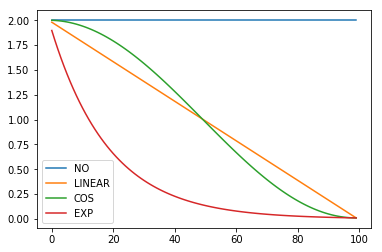

In [0]:
annealings = "NO LINEAR COS EXP".split()

a = torch.arange(0, 100)
p = torch.linspace(0.01,1,100)

fns = [sched_no, sched_lin, sched_cos, sched_exp]
for fn, t in zip(fns, annealings):
    f = fn(2, 1e-2)
    plt.plot(a, [f(o) for o in p], label=t)
plt.legend();

In [0]:
annealings

['NO', 'LINEAR', 'COS', 'EXP']

In [0]:
annealer

<function __main__.annealer>

## Combined schedulers

In practice, we'll often want to combine different scedulers, the following function does that: it uses `scheds[i]` for `pcts[i]` of the training

In [0]:
def combine_scheds(pcts, scheds):
    assert sum(pcts) == 1.
    pcts = tensor([0] + listify(pcts))
    assert torch.all(pcts >= 0)
    pcts = torch.cumsum(pcts, 0)
    def _inner(pos):
        idx = (pos >= pcts).nonzero().max()
        actual_pos = (pos-pcts[idx]) / (pcts[idx+1]-pcts[idx])
        return scheds[idx](actual_pos)
    return _inner

Here is an example: use 30% of the budget to go from 0.3 to 0.6 following a cosine, then the last 70% of the budget to go from 0.6 to 0.2, still following a cosine.

In [0]:
sched = combine_scheds([0.3, 0.7], [sched_cos(0.3, 0.6), sched_cos(0.6, 0.2)])

In [0]:
pcts = tensor([0] + listify([0.3,0.7]))

In [0]:
pcts

tensor([0.0000, 0.3000, 0.7000])

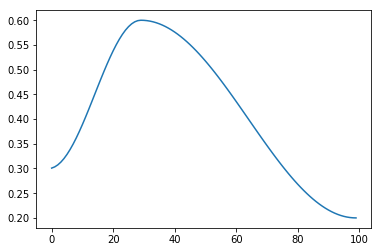

In [0]:
plt.plot(a, [sched(o) for o in p])

In [0]:
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy),
        partial(ParamScheduler, 'lr', sched)]

In [0]:
learn = create_learner(get_model_func(0.3), loss_func, data)
run = Runner(cb_funcs=cbfs)

In [0]:
run.fit(3,learn)

train: [0.805596328125, tensor(0.7709)]
valid: [0.347031201171875, tensor(0.8959)]
train: [0.30619357421875, tensor(0.9088)]
valid: [0.2460823974609375, tensor(0.9289)]
train: [0.24379509765625, tensor(0.9293)]
valid: [0.217735595703125, tensor(0.9389)]


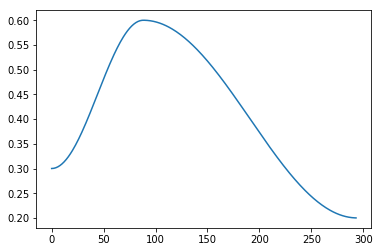

In [0]:
run.recorder.plot_lr()

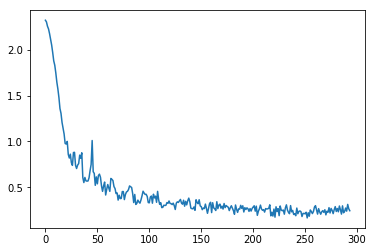

In [0]:
run.recorder.plot_loss()

# 06-cuda_cnn

 ## Foundations

In [0]:
import torch
import matplotlib.pyplot as plt

### Callbacks

In [0]:
import ipywidgets as widgets

In [0]:
def f(o): print('hi')

From the [ipywidget docs](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Events.html):<br>
* the button widget is used to handle mouse clicks.<br>
* The `on_click` method of the Button can be used to register function to be called when the button is clicked

In [0]:
w = widgets.Button(description='Click me')

In [0]:
w

Button(description='Click me', style=ButtonStyle())

hi


In [0]:
w.on_click(f)

### To create our own callback

In [0]:
from time import sleep

In [0]:
def slow_calculation():
  res = 0
  for i in range(5):
    res += i*i
    sleep(1)
  return res

In [0]:
slow_calculation()

30

In [0]:
def slow_calculation(cb=None):
  res = 0
  for i in range(5):
    res += i*i
    if cb: cb(i); print('running callback')
  return res

In [0]:
def show_progress(epoch):
  print(f"Awesome! We've finished epoch {epoch}!")

In [0]:
slow_calculation(cb=show_progress)

Awesome! We've finished epoch 0!
running callback
Awesome! We've finished epoch 1!
running callback
Awesome! We've finished epoch 2!
running callback
Awesome! We've finished epoch 3!
running callback
Awesome! We've finished epoch 4!
running callback


30

### Lambdas and partials

In [0]:
slow_calculation(lambda o:print(f"Awesome! We've finished epoch {o}"))

Awesome! We've finished epoch 0
running callback
Awesome! We've finished epoch 1
running callback
Awesome! We've finished epoch 2
running callback
Awesome! We've finished epoch 3
running callback
Awesome! We've finished epoch 4
running callback


30

In [0]:
def show_progress(exclamation, epoch):
  print(f"{exclamation}! We've finished epoch {epoch}!")

In [0]:
slow_calculation(lambda o: show_progress("OK I guess",o))

OK I guess! We've finished epoch 0!
running callback
OK I guess! We've finished epoch 1!
running callback
OK I guess! We've finished epoch 2!
running callback
OK I guess! We've finished epoch 3!
running callback
OK I guess! We've finished epoch 4!
running callback


30

In [0]:
def make_show_progress(exclamation):
  _inner = lambda epoch: print(f"{exclamation}! We've finished epoch {epoch}!")
  return _inner

In [0]:
slow_calculation(make_show_progress("Nicely done!"))

Nicely done!! We've finished epoch 0!
running callback
Nicely done!! We've finished epoch 1!
running callback
Nicely done!! We've finished epoch 2!
running callback
Nicely done!! We've finished epoch 3!
running callback
Nicely done!! We've finished epoch 4!
running callback


30

In [0]:
def make_show_progress(exclamation):
  # Leading "_" is generally understood to be "private"
  def _inner(epoch): print(f"{exclamation}! We've finished epoch {epoch}!")
  return _inner

In [0]:
slow_calculation(make_show_progress("Amazingly done!"))

Amazingly done!! We've finished epoch 0!
running callback
Amazingly done!! We've finished epoch 1!
running callback
Amazingly done!! We've finished epoch 2!
running callback
Amazingly done!! We've finished epoch 3!
running callback
Amazingly done!! We've finished epoch 4!
running callback


30

Here is the same work done by using `partial`

In [0]:
from functools import partial

In [0]:
def show_progress(exclamation, epoch):
  print(f"{exclamation}! We've finished epoch {epoch}!")

In [0]:
slow_calculation(partial(show_progress, "OK I think"))

OK I think! We've finished epoch 0!
running callback
OK I think! We've finished epoch 1!
running callback
OK I think! We've finished epoch 2!
running callback
OK I think! We've finished epoch 3!
running callback
OK I think! We've finished epoch 4!
running callback


30

In this way, `show_progress` originally takes two inputs (exclamation, epoch). With `partial`, we provide the first input slot, so that when `show_progress` is passed to `slow_calculation` as a callback function, it no longer require the first input argument and will take `i` as the second input argument to `epoch`

A good way to understand this is to play around with the positioning of the arguments: try swtich `exclamation` and `epoch`

In [0]:
def show_progress(epoch , exclamation):
  print(f"{exclamation}! We've finished epoch {epoch}!")

In [0]:
slow_calculation(partial(show_progress, "after switching"))

0! We've finished epoch after switching!
1! We've finished epoch after switching!
2! We've finished epoch after switching!
3! We've finished epoch after switching!
4! We've finished epoch after switching!


30

Now we can see, partial will always supply the first input argument so that our print out shows the reversed input argument positioning

## Callbacks as callable classes

### A simple example to create a callable Callback class

In [0]:
class ProgressShowingCallback():
  def __init__(self, exclamation="Awesome"): 
    self.exclamation = exclamation
  def __call__(self, epoch): 
    print(f"{self.exclamation}! We've finished epoch {epoch}!")

In [0]:
cb = ProgressShowingCallback("WOW!")

In [0]:
cb(epoch="505")

WOW!! We've finished epoch 505!


### Multiple callback funcs; *args and **kwargs

In [0]:
def f(*args, **kwargs):
  print(f"args:{args}; kwargs: {kwargs}")

In [0]:
f(3, 'a', thing1 = "hello")

args:(3, 'a'); kwargs: {'thing1': 'hello'}


In [0]:
def slow_calculation(cb=None):
  res = 0
  for i in range(5):
    if cb: cb.before_calc(i)
    res += i*i
    sleep(1)
    if cb: cb.after_calc(i, val=res)
  return

In [0]:
 class PrintStepCallback():
   def __init__(self): pass
   def before_calc(self, *args, **kwargs): print(f"About to start")
   def after_calc(self, *args, **kwargs): print(f"Done step")

In [0]:
slow_calculation(PrintStepCallback())

About to start
Done step
About to start
Done step
About to start
Done step
About to start
Done step
About to start
Done step


The example above don't actually use the args and kwargs passed in.<br>
To use them, we can't directly use the variable as passed in

In [0]:
 class PrintStepCallback():
   def __init__(self): pass
   def before_calc(self, *args, **kwargs): print(f"About to start")
   def after_calc(self, *args, **kwargs): print(f"Done step{i}, with res={val}")

In [0]:
slow_calculation(PrintStepCallback())

About to start


NameError: ignored

This results in an errer.<br>
So instead, we have to reserve the variables when defining our function

In [0]:
 class PrintStepCallback():
   def __init__(self): pass
   def before_calc(self, epoch, *args, **kwargs): print(f"About to start {epoch}")
   def after_calc(self, epoch, val, *args, **kwargs): print(f"Done step{epoch}, with res={val}")

In [0]:
slow_calculation(PrintStepCallback())

About to start 0
Done step0, with res=0
About to start 1
Done step1, with res=1
About to start 2
Done step2, with res=5
About to start 3
Done step3, with res=14
About to start 4
Done step4, with res=30


## Modifying behaviors

Another powerful application of callbacks is to modify the values of variables in the middle of a training process or to perform functions such as "early stopping"

### Early stop

In [0]:
def slow_calculation(cb=None):
  res = 0
  for i in range(5):
    if cb and hasattr(cb, 'before_calc'): cv.before_calc(i)
    res += i*i
    sleep(1)
    if cb and hasattr(cb, 'after_calc'): # if callback doesn't exit, don't run
      if cb.after_calc(i, res):
        print("early stopping")
        break
  return res

NOTE that here we haven't define 'before_calc'. Since in `slow_calculation` we have a line to check if certain callback functions are being created, this wouldn't give an error

In [0]:
class PrintAfterCallback():
  def after_calc(self, epoch, val):
    print(f"after {epoch}:{val}")
    if val>10: return True

In [0]:
slow_calculation(PrintAfterCallback())

after 0:0
after 1:1
after 2:5
after 3:14
early stopping


14

### Modifying variable

In order for our callbacks to modify values of certain variables in the training loop, it's good to construct the training function as a **`Class`** and the modifiable variable as one of its **attribute**

In [0]:
class SlowCalculator():
  # here this class has two attributes: 'cb' and 'res'
  def __init__(self, cb=None): self.cb, self.res = cb, 0

  def callback(self, cb_name, *args):
    if not self.cb: return
    cb = getattr(self.cb, cb_name, None)
    if cb: return cb(self, *args)

  def calc(self):
    for i in range(5):
      self.callback('before_calc', i)
      self.res += i*i
      sleep(1)
      if self.callback('after_calc', i):
        print("stopping early")
        break

In [0]:
class ModifyingCallback():
  def after_calc(self, calc, epoch):
    print(f"After {epoch}, the res is {calc.res}")
    if calc.res > 10: return True
    if calc.res < 3: calc.res = calc.res*2

In [0]:
calculator = SlowCalculator(ModifyingCallback())

In [0]:
calculator.calc()

After 0, the res is 0
After 1, the res is 1
After 2, the res is 6
After 3, the res is 15
stopping early


In [0]:
calculator.res

15

## ConvNet

### Standard normalized dataset

In [0]:
from nb_05b import *
torch.set_num_threads(2)

In [0]:
x_train, y_train, x_valid, y_valid = get_data()

In [0]:
def normalize_to(train, valid):
  m, s = train.mean(), train.std()
  return normalize(train, m, s), normalize(valid, m, s)

In [0]:
x_train, x_valid = normalize_to(x_train, x_valid)
train_ds, valid_ds = Dataset(x_train, y_train), Dataset(x_valid, y_valid)

Let's check it behaved properly

In [0]:
(f"the mean and std after normalization: {x_train.mean():.2f}, {x_train.std()}")

'the mean and std after normalization: 0.00, 1.0'

In [0]:
nh, bs = 50, 512
c = y_train.max().item()+1
loss_func = F.cross_entropy

data = DataBunch(*get_dls(train_ds,valid_ds,bs),c)

In [0]:
data.c

10

To refactor layers, it's useful to have a Lambda layer that can take a basic function and voncert it to a layer you can put in nn.Sequential.


In [0]:
class Lambda(nn.Module):
  def __init__(self, func):
    super().__init__()
    self.func = func
  
  def forward(self, x): return self.func(x)

def flatten(x): return x.view(x.shape[0], -1)

In [0]:
# This function takes the flat vector of size bsx784 and puts it back as a batch of images of 28 by 28 pixels
def mnist_resize(x):
  return x.view(-1,1,28,28)

defin a simple CNN with input of bsx784

In [0]:
def get_cnn_model(data):
    return nn.Sequential(
        Lambda(mnist_resize),
        nn.Conv2d( 1, 8, 5, padding=2,stride=2), nn.ReLU(), #14
        nn.Conv2d( 8,16, 3, padding=1,stride=2), nn.ReLU(), # 7
        nn.Conv2d(16,32, 3, padding=1,stride=2), nn.ReLU(), # 4
        nn.Conv2d(32,32, 3, padding=1,stride=2), nn.ReLU(), # 2
        nn.AdaptiveAvgPool2d(1),
        Lambda(flatten),
        nn.Linear(32,data.c)
    )

In [0]:
model = get_cnn_model(data)

Get some callbacks

In [0]:
cbfs = [Recorder, partial(AvgStatsCallback,accuracy)]

In [0]:
opt = optim.SGD(model.parameters(), lr=0.4)
learn = Learner(model, opt, loss_func, data)
run = Runner(cb_funcs=cbfs)

In [0]:
%time run.fit(1, learn)

train: [1.95304984375, tensor(0.3216)]
valid: [0.666820166015625, tensor(0.8044)]
CPU times: user 6.92 s, sys: 312 ms, total: 7.24 s
Wall time: 4.53 s


### Refactor model

In [0]:
def conv2d(ni, nf, ks=3, stride=2):
    return nn.Sequential(
        nn.Conv2d(ni, nf, ks, padding=ks//2, stride=stride), nn.ReLU())

Another thing we acn do is to refactor the Callback for mnist resize

In [0]:
class BatchTransformXCallback(Callback):
  _order=2
  def __init__(self, tfm): self.tfm = tfm
  def begin_batch(self): self.run.xb = self.tfm(self.xb)

def view_tfm(*size):
  def _inner(x): return x.view(*((-1,)+size))
  return _inner

In [0]:
mnist_view = view_tfm(1,28,28)

In [0]:
cbfs.append(partial(BatchTransformXCallback, mnist_view))

In [0]:
# with the AdaptiveAvfPool, this model can now work on any size input
nfs = [8,16,32,32]

In [0]:
def get_cnn_layers(data, nfs):
    nfs = [1] + nfs
    return [
        conv2d(nfs[i], nfs[i+1], 5 if i==0 else 3)
        for i in range(len(nfs)-1)
    ] + [nn.AdaptiveAvgPool2d(1), Lambda(flatten), nn.Linear(nfs[-1], data.c)]

def get_cnn_model(data, nfs): return nn.Sequential(*get_cnn_layers(data, nfs))

In [0]:
#export
def get_runner(model, data, lr=0.6, cbs=None, opt_func=None, loss_func = F.cross_entropy):
    if opt_func is None: opt_func = optim.SGD
    opt = opt_func(model.parameters(), lr=lr)
    learn = Learner(model, opt, loss_func, data)
    return learn, Runner(cb_funcs=listify(cbs))

In [0]:
model = get_cnn_model(data, nfs)
learn, run = get_runner(model, data, lr=0.4, cbs=cbfs)

In [0]:
model

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): ReLU()
  )
  (1): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (4): AdaptiveAvgPool2d(output_size=1)
  (5): Lambda()
  (6): Linear(in_features=32, out_features=10, bias=True)
)

In [0]:
run.fit(3, learn)

train: [2.1686053125, tensor(0.2143)]
valid: [1.62313583984375, tensor(0.4454)]
train: [0.71525859375, tensor(0.7560)]
valid: [0.3542329345703125, tensor(0.8848)]
train: [0.27667365234375, tensor(0.9110)]
valid: [0.18471136474609376, tensor(0.9428)]


## Hook

### The manual way

Here we want to do some telemetry, and find the mean and standard deviation of each activations in the model. <br>
Here is a manual attempt

In [0]:
class SequentialModel(nn.Module):
    def __init__(self, *layers):
        super().__init__()
        self.layers = nn.ModuleList(layers)
        self.act_means = [[] for _ in layers]
        self.act_stds  = [[] for _ in layers]
        
    def __call__(self, x):
        for i,l in enumerate(self.layers):
            x = l(x)
            self.act_means[i].append(x.data.mean())
            self.act_stds [i].append(x.data.std ())
        return x
    
    def __iter__(self): return iter(self.layers)

In [0]:
get_cnn_layers(data,nfs)

[Sequential(
   (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
   (1): ReLU()
 ), Sequential(
   (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
   (1): ReLU()
 ), Sequential(
   (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
   (1): ReLU()
 ), Sequential(
   (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
   (1): ReLU()
 ), AdaptiveAvgPool2d(output_size=1), Lambda(), Linear(in_features=32, out_features=10, bias=True)]

In [0]:
get_cnn_layers(data,nfs)[0]

Sequential(
  (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (1): ReLU()
)

In [0]:
model =  SequentialModel(*get_cnn_layers(data, nfs))
learn,run = get_runner(model, data, lr=0.9, cbs=cbfs)

In [0]:
run.fit(3, learn)

train: [2.17252859375, tensor(0.2150)]
valid: [1.4119009765625, tensor(0.5927)]
train: [0.6539666015625, tensor(0.7914)]
valid: [0.2365609375, tensor(0.9266)]
train: [0.20363205078125, tensor(0.9373)]
valid: [0.14030103759765625, tensor(0.9582)]


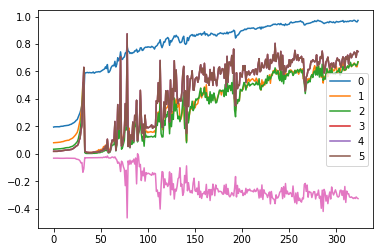

In [0]:
for l in model.act_means: plt.plot(l)
plt.legend(range(6));

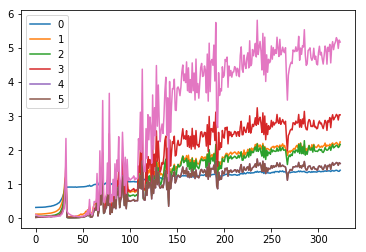

In [0]:
for l in model.act_stds: plt.plot(l)
plt.legend(range(6));

### The actual hooks

Hooks don't require us to rewrite the model

In [0]:
model = get_cnn_model(data, nfs)
learn, run = get_runner(model, data, lr=0.5, cbs=cbfs)

In [0]:
act_means = [[] for _ in model]
act_stds  = [[] for _ in model]

A hook is attached to a leyer, and needs to have a function that takes three argument `(module, input, output)`.<br>
Here we store the mean and std of the output in the correct position of our list


In [0]:
def append_stats(i, mod, inp, outp):
  act_means[i].append(outp.data.mean())
  act_stds[i].append(outp.data.std())

In [0]:
for i , m in enumerate(model): m.register_forward_hook(partial(append_stats,i))

In [0]:
run.fit(1, learn)

train: [1.80305828125, tensor(0.3697)]
valid: [0.48628095703125, tensor(0.8553)]


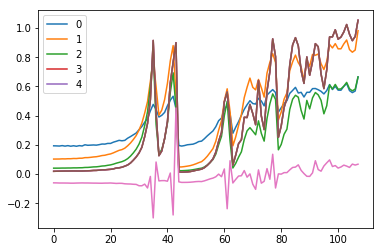

In [0]:
for o in act_means: plt.plot(o)
plt.legend(range(5));

### Hook class

In [0]:
def children(m): return list(m.children())

class Hook():
  def __init__(self, m, f): self.hook = m.register_forward_hook(partial(f, self))
  def remove(self): self.hook.remove()
  def __del__(self): self.remove()

def append_stats(hook, mod, inp, outp):
  if not hasattr(hook, 'stats'): hook.stats = ([],[])
  means, stds = hook.stats
  means.append(outp.data.mean())
  stds.append(outp.data.std())

In [0]:
model = get_cnn_model(data, nfs)
learn, run = get_runner(model, data, lr=0.5, cbs=cbfs)

In [0]:
hooks = [Hook(l,append_stats) for l in children(model[:4])]

In [0]:
run.fit(1, learn)

train: [2.01215140625, tensor(0.2929)]
valid: [1.1064599609375, tensor(0.6361)]


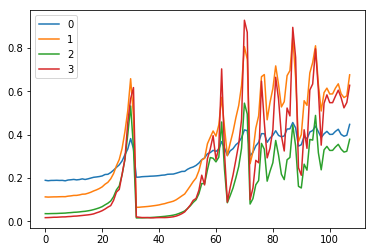

In [0]:
for h in hooks:
    plt.plot(h.stats[0])
    h.remove()
plt.legend(range(4));

# 07-Batchnorm

In [0]:
from nb_06 import *

## ConvNet

In [0]:
x_train,y_train,x_valid,y_valid = get_data()

x_train,x_valid = normalize_to(x_train,x_valid)
train_ds,valid_ds = Dataset(x_train, y_train),Dataset(x_valid, y_valid)

nh,bs = 50,512
c = y_train.max().item()+1
loss_func = F.cross_entropy

data = DataBunch(*get_dls(train_ds, valid_ds, bs), c)

In [0]:
mnist_view = view_tfm(1,28,28)
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy),
        CudaCallback,
        partial(BatchTransformXCallback, mnist_view)]

In [0]:
nfs = [8,16,32,64,64]

In [0]:
learn,run = get_learn_run(nfs, data, 0.4, conv_layer, cbs=cbfs)

In [0]:
%time run.fit(2, learn)

train: [0.975734609375, tensor(0.6811, device='cuda:0')]
valid: [0.1576437255859375, tensor(0.9541, device='cuda:0')]
train: [0.157903271484375, tensor(0.9510, device='cuda:0')]
valid: [0.11011591796875, tensor(0.9679, device='cuda:0')]
CPU times: user 4.62 s, sys: 1.7 s, total: 6.32 s
Wall time: 9.62 s


This is the result of CNN without batch-norm

## Batchnorm

In [0]:
class BatchNorm(nn.Module):
    def __init__(self, nf, mom=0.1, eps=1e-5):
        super().__init__()
        # NB: pytorch bn mom is opposite of what you'd expect
        self.mom,self.eps = mom,eps
        self.mults = nn.Parameter(torch.ones (nf,1,1))
        self.adds  = nn.Parameter(torch.zeros(nf,1,1))
        self.register_buffer('vars',  torch.ones(1,nf,1,1))
        self.register_buffer('means', torch.zeros(1,nf,1,1))

    def update_stats(self, x):
        m = x.mean((0,2,3), keepdim=True)
        v = x.var ((0,2,3), keepdim=True)
        self.means.lerp_(m, self.mom)
        self.vars.lerp_ (v, self.mom)
        return m,v
        
    def forward(self, x):
        if self.training:
            with torch.no_grad(): m,v = self.update_stats(x)
        else: m,v = self.means,self.vars
        x = (x-m) / (v+self.eps).sqrt()
        return x*self.mults + self.adds

In [0]:
def conv_layer(ni, nf, ks=3, stride=2, bn=True, **kwargs):
    # No bias needed if using bn
    layers = [nn.Conv2d(ni, nf, ks, padding=ks//2, stride=stride, bias=not bn),
              GeneralRelu(**kwargs)]
    if bn: layers.append(BatchNorm(nf))
    return nn.Sequential(*layers)

In [0]:
#export
def init_cnn_(m, f):
    if isinstance(m, nn.Conv2d):
        f(m.weight, a=0.1)
        if getattr(m, 'bias', None) is not None: m.bias.data.zero_()
    for l in m.children(): init_cnn_(l, f)

def init_cnn(m, uniform=False):
    f = init.kaiming_uniform_ if uniform else init.kaiming_normal_
    init_cnn_(m, f)

def get_learn_run(nfs, data, lr, layer, cbs=None, opt_func=None, uniform=False, **kwargs):
    model = get_cnn_model(data, nfs, layer, **kwargs)
    init_cnn(model, uniform=uniform)
    return get_runner(model, data, lr=lr, cbs=cbs, opt_func=opt_func)

In [0]:
learn, run = get_learn_run(nfs, data, 0.9, conv_layer, cbs=cbfs)

train: [0.27886375, tensor(0.9128, device='cuda:0')]
valid: [0.15881351318359374, tensor(0.9456, device='cuda:0')]


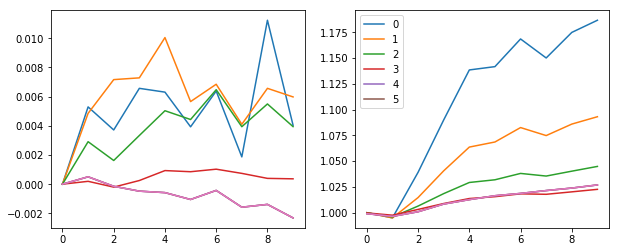

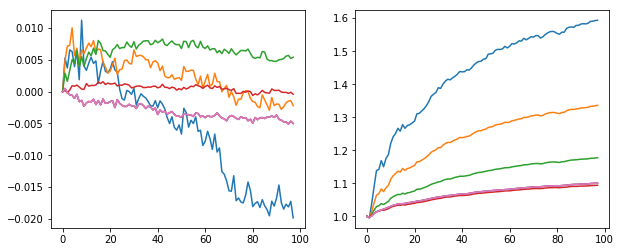

In [0]:
with Hooks(learn.model, append_stats) as hooks:
    run.fit(1, learn)
    fig,(ax0,ax1) = plt.subplots(1,2, figsize=(10,4))
    for h in hooks[:-1]:
        ms,ss = h.stats
        ax0.plot(ms[:10])
        ax1.plot(ss[:10])
        h.remove()
    plt.legend(range(6));
    
    fig,(ax0,ax1) = plt.subplots(1,2, figsize=(10,4))
    for h in hooks[:-1]:
        ms,ss = h.stats
        ax0.plot(ms)
        ax1.plot(ss)

# 08-Data_block API foundations

In [0]:
from nb_07a import *

In [0]:
datasets.URLs.IMAGENETTE_160

'https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160'

## Get images

In [0]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE_160)
path

PosixPath('/root/.fastai/data/imagenette-160')

To be able to look at what's inside a directory from a notebook, we ad the `.ls` method to `Path` with a monkey-patch.

In [0]:
import PIL, os, mimetypes
Path.ls = lambda x: list(x.iterdir())

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/imagenette-160/val'),
 PosixPath('/root/.fastai/data/imagenette-160/train')]

In [0]:
# There is one directory for each category
(path/'val').ls()

[PosixPath('/root/.fastai/data/imagenette-160/val/n03445777'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03425413'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03394916'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n02102040'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03028079'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03000684'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n02979186'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03888257'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03417042')]

In [0]:
path_tench = path/'val'/'n01440764'

In [0]:
img_fn = path_tench.ls()[0]
img_fn

PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00037834.JPEG')

In [0]:
img = PIL.Image.open(img_fn)

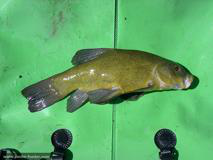

In [0]:
img

In [0]:
import numpy
imga = numpy.array(img)

In [0]:
imga.shape

(160, 213, 3)

In [0]:
imga[:10,:10,0]

array([[126, 125, 125, 125, ..., 127, 126, 135, 133],
       [125, 126, 127, 125, ..., 129, 133, 133, 130],
       [125, 127, 127, 126, ..., 132, 137, 130, 126],
       [125, 126, 126, 128, ..., 134, 134, 125, 122],
       ...,
       [125, 129, 134, 137, ..., 124, 120, 114, 113],
       [124, 132, 140, 138, ..., 121, 124, 113, 112],
       [128, 134, 132, 123, ..., 121, 109, 111, 106],
       [128, 133, 131, 124, ..., 122, 112, 110, 105]], dtype=uint8)

 Just in case there are other files in the directory (models, texts,...) we want to keep only the images. <br>
 Let's not weite it out by hand, but instead use what's already on our computer (the MIME teypes database).

In [0]:
#export
image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))

In [0]:
' '.join(image_extensions)

'.jp2 .ras .wbmp .cr2 .jng .erf .cpt .jpg .rgb .jpf .jpg2 .ppm .svg .pcx .pnm .tiff .pbm .gif .tif .xwd .djvu .art .ico .crw .jpm .pat .svgz .xbm .cdr .nef .ief .jpeg .cdt .png .bmp .xpm .jpx .djv .orf .psd .jpe .pgm'

In [0]:
def setify(o): return o if isinstance(o, set) else set(listify(o))

In [0]:
test_eq(setify('aa'), {'aa'})
test_eq(setify(['aa',1]), {'aa',1})
test_eq(setify(None), set())
test_eq(setify(1), {1})
test_eq(setify({1}), {1})

In [0]:
def _get_files(p, fs, extensions=None):
  p = Path(p)
  res = [p/f for f in fs if not f.startswith('.')
          and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
  return res

In [0]:
t = [o.name for o in os.scandir(path_tench)]

In [0]:
t

['ILSVRC2012_val_00037834.JPEG',
 'ILSVRC2012_val_00009111.JPEG',
 'ILSVRC2012_val_00039905.JPEG',
 'ILSVRC2012_val_00011993.JPEG',
 'ILSVRC2012_val_00009346.JPEG',
 'ILSVRC2012_val_00024327.JPEG',
 'ILSVRC2012_val_00026064.JPEG',
 'ILSVRC2012_val_00037861.JPEG',
 'ILSVRC2012_val_00021740.JPEG',
 'ILSVRC2012_val_00026397.JPEG',
 'ILSVRC2012_val_00029930.JPEG',
 'ILSVRC2012_val_00037596.JPEG',
 'ILSVRC2012_val_00045880.JPEG',
 'ILSVRC2012_val_00046499.JPEG',
 'ILSVRC2012_val_00048969.JPEG',
 'ILSVRC2012_val_00002138.JPEG',
 'ILSVRC2012_val_00017699.JPEG',
 'ILSVRC2012_val_00028158.JPEG',
 'ILSVRC2012_val_00024235.JPEG',
 'ILSVRC2012_val_00006697.JPEG',
 'ILSVRC2012_val_00045866.JPEG',
 'ILSVRC2012_val_00009191.JPEG',
 'ILSVRC2012_val_00046252.JPEG',
 'ILSVRC2012_val_00017472.JPEG',
 'ILSVRC2012_val_00041939.JPEG',
 'ILSVRC2012_val_00018317.JPEG',
 'ILSVRC2012_val_00017995.JPEG',
 'ILSVRC2012_val_00011233.JPEG',
 'ILSVRC2012_val_00048204.JPEG',
 'ILSVRC2012_val_00009379.JPEG',
 'ILSVRC20

In [0]:
t = _get_files(path, t, extensions=image_extensions)

In [0]:
t[:3]

[PosixPath('/root/.fastai/data/imagenette-160/ILSVRC2012_val_00037834.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/ILSVRC2012_val_00009111.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/ILSVRC2012_val_00039905.JPEG')]

Now, `t` contains all the `path` objects in **one** directory

In [0]:
# putting everthing together
def get_files(path, extensions=None, recurse=False, include=None):
  path = Path(path)
  extensions = setify(extensions)
  extensions = {e.lower() for e in extensions}
  if recurse:
    res = []
    for p,d,f in os.walk(path): # returns (dirpath, dirnames, filenames)
      if include is not None: d[:] = [o for o in d if o in include]
      else:                  d[:] = [o for o in d if not o.startswith('.')]
      res += _get_files(p, f, extensions)
    return res
  else:
    f = [o.name for o in os.scandir(path) if o.is_file()]
    return _get_files(path, f, extensions)

In [0]:
get_files(path_tench, image_extensions)[:3]

[PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00037834.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00009111.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00039905.JPEG')]

We need the `recurse` argument when we start from `path`, since the pictures are two levels below in the directories.

In [0]:
get_files(path, image_extensions, recurse=True)[:3]

[PosixPath('/root/.fastai/data/imagenette-160/val/n03445777/ILSVRC2012_val_00012634.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03445777/ILSVRC2012_val_00023215.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03445777/ILSVRC2012_val_00003793.JPEG')]

In [0]:
all_fns = get_files(path, image_extensions, recurse=True)

In [0]:
len(all_fns)

13394

In [0]:
%timeit -n 10 get_files(path, image_extensions, recurse=True)

10 loops, best of 3: 83 ms per loop


## Prepare for modeling

What we need to do:

- Get files
- Split validation set
  - random%, folder name, csv, ...
- Label: 
  - folder name, file name/re, csv, ...
- Transform per image (optional)
- Transform to tensor
- DataLoader
- Transform per batch (optional)
- DataBunch
- Add test set (optional)

### Get files

We use the `ListContainer` class from notebook 06 to store our objects in an ItemList. The get method will need to be subclassed to explain how to access an element(open an image for instance), then the `private_get` method can allow us to apply any additional transformation to it. <br>


In [0]:
#export
def compose(x, funcs, *args, order_key='_order', **kwargs):
    key = lambda o: getattr(o, order_key, 0)
    for f in sorted(listify(funcs), key=key): x = f(x, **kwargs)
    return x

class ItemList(ListContainer):
    def __init__(self, items, path='.', tfms=None):
        super().__init__(items)
        self.path,self.tfms = Path(path),tfms

    def __repr__(self): return f'{super().__repr__()}\nPath: {self.path}'
    
    def new(self, items, cls=None):
        if cls is None: cls=self.__class__
        return cls(items, self.path, tfms=self.tfms)
    
    def  get(self, i): return i
    def _get(self, i): return compose(self.get(i), self.tfms)
    
    def __getitem__(self, idx):
        res = super().__getitem__(idx)
        if isinstance(res,list): return [self._get(o) for o in res]
        return self._get(res)

class ImageList(ItemList):
    @classmethod
    def from_files(cls, path, extensions=None, recurse=True, include=None, **kwargs):
        if extensions is None: extensions = image_extensions
        return cls(get_files(path, extensions, recurse=recurse, include=include), path, **kwargs)
    
    def get(self, fn): return PIL.Image.open(fn)

In [0]:
#export
class Transform(): _order=0

class MakeRGB(Transform):
    def __call__(self, item): return item.convert('RGB')

def make_rgb(item): return item.convert('RGB')

In [0]:
il = ImageList.from_files(path, tfms=make_rgb)
il

ImageList (13394 items)
[PosixPath('/root/.fastai/data/imagenette-160/val/n03445777/ILSVRC2012_val_00012634.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03445777/ILSVRC2012_val_00023215.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03445777/ILSVRC2012_val_00003793.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03445777/ILSVRC2012_val_00038447.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03445777/ILSVRC2012_val_00002314.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03445777/ILSVRC2012_val_00013633.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03445777/ILSVRC2012_val_00014102.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03445777/ILSVRC2012_val_00031744.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03445777/ILSVRC2012_val_00019268.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03445777/ILSVRC2012_val_00030938.JPEG')...]
Path: /root/.fastai/data/imagenette-160

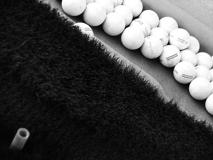

In [0]:
img = il[0]
img

In [0]:
il[:1]

[<PIL.Image.Image image mode=RGB size=213x160 at 0x7F384DECE6D8>]

### Split validation set

Here, we need to split the files between those in the folder train and those in the folder val.

In [0]:
fn = il.items[0]

In [0]:
fn

PosixPath('/root/.fastai/data/imagenette-160/val/n03445777/ILSVRC2012_val_00012634.JPEG')

Since our filenames are `path` object, we can find the directory of the file with `.parent`. <br>
We need to go back two folders before since the last folders are the class names.

In [0]:
fn.parent.parent

PosixPath('/root/.fastai/data/imagenette-160/val')

In [0]:
fn.parent.parent.name

'val'

In [0]:
def grandparent_splitter(fn, valid_name='valid', train_name='train'):
  gp = fn.parent.parent.name
  return True if gp==valid_name else False if gp == train_name else None

In [0]:
def split_by_func(ds, f):
  items = ds.items
  mask = [f(o) for o in items]
  # 'None' values will be filtered out
  train = [o for o,m in zip(items, mask) if m==False]
  valid = [o for o,m in zip(items, mask) if m==True]
  return train, valid

In [0]:
splitter = partial(grandparent_splitter, valid_name='val')

In [0]:
train, valid = split_by_func(il,splitter)

In [0]:
len(train), len(valid)

(12894, 500)

Let's create a class that contrains it. It just needs two `ItemList` to be initialized, and we create a shortcut to all the unknown attributes by trying to grab them in the `train` `ItemList`

### Labeling

Labeling has to be done after splitting, because it uses training set information to apply to the validation set, using a **Processor**.
A Processor is a transformation that is applied to all the inputs once at initialization, with some state computed on the training set that is then apoplied without modification on the validation set (and maybe the test set or at inference time on a single item). <br>
FOr instance, it  could be **processing texts** to **tokenize**, then **numericalize** them. In that case we want the validation set to be numericalized with exactly the same vocabulary as the trianing set. <br>
Another example is in **tabular data**, where we **fill missing values** with (for instance) the median computed on the training set. That statistic is stored in the inner state of the *Processor* and applied on the validation set.
In our case, we want to **conver label strings to numbers** in a consistent and reproducible way. So we create a list of possible labels in the training set, and then convert our labels to numbers based on this *vocab*.

In [0]:
from collections import OrderedDict

def uniqueify(x, sort=False):
  res = list(OrderedDict.fromkeys(x).keys())
  if sort: res.sort()

  return res

First, let's define the processor. We also define a `ProcessedItemList` with an `obj` method that can get the unprocessed items: for instance a processed label will be an index between 0 and the number of classes-1, the corresponding `obj` will be the name of the calss.The first one is needed by the model for the trianing, but the second one is better for displaying the objects.


In [0]:
class Processor():
  def process(slef, items): return items

class CategoryProcessor(Processor):
  def __init__(self): self.vocab = None
  def __call__(self, items):
    # The vocab is defined on the first use.
    if self.vocab is None:
      self.vocab = uniqueify(items)
      self.otoi = {v:k for k,v in enumerate(self.vocab)}
    return [self.procl(o) for o in items]

  def procl(self, item): return self.otoi[item]

  def deprocess(self, idxs):
    assert self.vocab is not None
    return [self.deprocl(idx) for idx in idxs]

  def deprocl(self, idx): return self.vocab[idx]

Here we label according to the folders of the images, so simply `fn.parent.name` . We label the training set first with a newly created `CategoryProcessor` so that it computes its inner `vocab` on that set. <br>
Then we label the  validation set using the same processor, which means it uses the same vocab. The end result is another `SplitData` object.

In [0]:
#export
def parent_labeler(fn): return fn.parent.name

def _label_by_func(ds, f, cls=ItemList): return cls([f(o) for o in ds.items], path=ds.path)

#This is a slightly different from what was seen during the lesson,
#   we'll discuss the changes in lesson 11
class LabeledData():
    def process(self, il, proc): return il.new(compose(il.items, proc))

    def __init__(self, x, y, proc_x=None, proc_y=None):
        self.x,self.y = self.process(x, proc_x),self.process(y, proc_y)
        self.proc_x,self.proc_y = proc_x,proc_y
        
    def __repr__(self): return f'{self.__class__.__name__}\nx: {self.x}\ny: {self.y}\n'
    def __getitem__(self,idx): return self.x[idx],self.y[idx]
    def __len__(self): return len(self.x)
    
    def x_obj(self, idx): return self.obj(self.x, idx, self.proc_x)
    def y_obj(self, idx): return self.obj(self.y, idx, self.proc_y)
    
    def obj(self, items, idx, procs):
        isint = isinstance(idx, int) or (isinstance(idx,torch.LongTensor) and not idx.ndim)
        item = items[idx]
        for proc in reversed(listify(procs)):
            item = proc.deproc1(item) if isint else proc.deprocess(item)
        return item

    @classmethod
    def label_by_func(cls, il, f, proc_x=None, proc_y=None):
        return cls(il, _label_by_func(il, f), proc_x=proc_x, proc_y=proc_y)

def label_by_func(sd, f, proc_x=None, proc_y=None):
    train = LabeledData.label_by_func(sd.train, f, proc_x=proc_x, proc_y=proc_y)
    valid = LabeledData.label_by_func(sd.valid, f, proc_x=proc_x, proc_y=proc_y)
    return SplitData(train,valid)

In [0]:
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())

NameError: ignored

### Transform to tensors

In [0]:
class ResizeFixed(Transform):
  _order=10
  def __init__(slef, size):
    if isinstance(size, int): size = (size, size)
    self.size = size

  def __call__(self,item): return item.resize(self.size, PIL.Image.BILINEAR)

def to_byte_tensor(item):
  res = torch.ByteTensor(torch.ByteStorage.from_buffer(item.tobytes()))
  w, h = item.size
  return res.view(h,w,-1).permute(2,0,1)
to_byte_tensor._order=20

def to_float_tensor(item): return item.float().div_(255.)
to_float_tensor._order=30

### DataBunch

In [0]:
bs = 64
train_dl, valid_dl = get_dls(ll.train, ll.valid, bs)

NameError: ignored

# 09-Optimizor tweaks

## Imagenette data

In [0]:
from nb_08 import *

In [0]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE_160)

In [0]:
tfms = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]
bs=128

il = ImageList.from_files(path, tfms = tfms)
sd = SplitData.split_by_func(il, partial(grandparent_splitter, valid_name='val'))
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())
data = ll.to_databunch(bs, c_in=3, c_out=10)

Then a basic model:

In [0]:
nfs = [32,64,128,256]

In [0]:
cbfs = [partial(AvgStatsCallback, accuracy), CudaCallback,\
        partial(BatchTransformXCallback, norm_imagenette)]

In [0]:
# Create a baseline training model with vanilla SGD
learn, run = get_learn_run(nfs, data, 0.4, conv_layer, cbs=cbfs)

In [0]:
run.fit(1,learn)

train: [1.6944772641344812, tensor(0.4205, device='cuda:0')]
valid: [1.456836181640625, tensor(0.4900, device='cuda:0')]


## Refine our optimizer

In PyTorch, the base optimizer in `torch.optim` is just a dictionary that stores the **hyper-parameters** and **rederences** to the parameters of the model we want to train in parameter groups (different groups can have different leraning rates/momentum/weight decay... which is what lets us do discriminative learning rates). <br>
It contains a method `step` that wil update our parameters with the gradients and a method `zero_grad` to detach and zero the gradients of all our parameters. <br>
We build the equivalent from scratch, only ours will be more flexible. In our implementation, the **`step`** funtion loop over all the parameters to execute the step using *stepper functions* that we have to provide whten initializing the optimizer.

In [0]:
class Optimizer():
    def __init__(self, params, steppers, **defaults):
        # might be a generator
        self.param_groups = list(params)
        # ensure params is a list of lists
        if not isinstance(self.param_groups[0], list): self.param_groups = [self.param_groups]
        self.hypers = [{**defaults} for p in self.param_groups]
        self.steppers = listify(steppers)

    def grad_params(self):
        return [(p,hyper) for pg,hyper in zip(self.param_groups,self.hypers)
            for p in pg if p.grad is not None]

    def zero_grad(self):
        for p,hyper in self.grad_params():
            p.grad.detach_()
            p.grad.zero_()

    def step(self):
        for p,hyper in self.grad_params(): compose(p, self.steppers, **hyper)

The `**defaults` here is a set of default hyuper parameters such as learning_rate, momumtun, beta, epsi in Adam.

The difference that FastAI has as compared to PyTorch is that the `step` function actually doesn't excute anything and we need to create a **stepper** in order to complete the update process. <br>
The flexibility in this is that we now can create our **stepper** function in various way in order to implement all those fancy optimizers in the paper.

In [0]:
#export
def sgd_step(p, lr, **kwargs):
    p.data.add_(-lr, p.grad.data)
    return p

In [0]:
opt_func = partial(Optimizer, steppers=[sgd_step])

Now that we have changed the optimizer, we will need to adjust the calbacks that were using properties from the PyTorch optimizer: <br>
in particular the hyper-parameters are in the list of dictionaries `opt.hypers` (PyTorch has everything in a list of list of param groups).

In [0]:
#export
class Recorder(Callback):
    def begin_fit(self): self.lrs,self.losses = [],[]

    def after_batch(self):
        if not self.in_train: return
        self.lrs.append(self.opt.hypers[-1]['lr'])
        self.losses.append(self.loss.detach().cpu())        

    def plot_lr  (self): plt.plot(self.lrs)
    def plot_loss(self): plt.plot(self.losses)
        
    def plot(self, skip_last=0):
        losses = [o.item() for o in self.losses]
        n = len(losses)-skip_last
        plt.xscale('log')
        plt.plot(self.lrs[:n], losses[:n])

class ParamScheduler(Callback):
    _order=1
    def __init__(self, pname, sched_funcs):
        self.pname,self.sched_funcs = pname,listify(sched_funcs)

    def begin_batch(self): 
        if not self.in_train: return
        fs = self.sched_funcs
        if len(fs)==1: fs = fs*len(self.opt.param_groups)
        pos = self.n_epochs/self.epochs
        for f,h in zip(fs,self.opt.hypers): h[self.pname] = f(pos)
            
class LR_Find(Callback):
    _order=1
    def __init__(self, max_iter=100, min_lr=1e-6, max_lr=10):
        self.max_iter,self.min_lr,self.max_lr = max_iter,min_lr,max_lr
        self.best_loss = 1e9
        
    def begin_batch(self): 
        if not self.in_train: return
        pos = self.n_iter/self.max_iter
        lr = self.min_lr * (self.max_lr/self.min_lr) ** pos
        for pg in self.opt.hypers: pg['lr'] = lr
            
    def after_step(self):
        if self.n_iter>=self.max_iter or self.loss>self.best_loss*10:
            raise CancelTrainException()
        if self.loss < self.best_loss: self.best_loss = self.loss

A sanity check

In [0]:
sched = combine_scheds([0.3, 0.7], [sched_cos(0.3, 0.6), sched_cos(0.6, 0.2)]) 

In [0]:
cbfs = [partial(AvgStatsCallback,accuracy),
        CudaCallback,
        Recorder,
        partial(ParamScheduler, 'lr', sched)]

In [0]:
learn,run = get_learn_run(nfs, data, 0.4, conv_layer, cbs=cbfs, opt_func=opt_func)

In [0]:
%time run.fit(1, learn)

train: [1.7306549133802545, tensor(0.4048, device='cuda:0')]
valid: [1.285982421875, tensor(0.5760, device='cuda:0')]
CPU times: user 1min 3s, sys: 4.9 s, total: 1min 8s
Wall time: 40.5 s


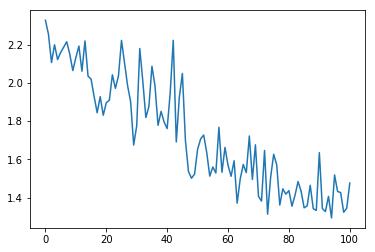

In [0]:
run.recorder.plot_loss()

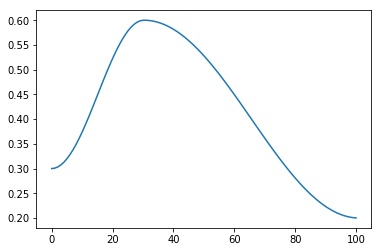

In [0]:
run.recorder.plot_lr()

## Weight decay

To prevent overfitting, we apply some regularization methods in the process.
**Weight devay** comes from the idea of **L2 regularization**, which consists in adding to our loss function the sum of all the weights squared. The reason is becaus when we compute the gradients, it will add a contributino to them that will encourage the weights to be as small as possible. <br>
Limiting our weights from growing too much is going to hinder the training of the model, but it will yield to a state where it generalizes better. Going back to the theory a little bit, weight decay (wd) is a parameter that controls that sum of squares we add to our loss:
$loss\_with\_wd = loss+(wd/2)*(weights**2).sum()$ <br>
In practice, it would be very inefficient (and numerically unstable) to compute that big sum and add it to the loss. <br>
The derivative of p**2 with respect to p is 2*p. So adding that big sum to our loss is eactly the same as doing: <br>
$weigh.grad += wd*weight$ <br>
For every weight in our model, which in the case of vanilla SGD is equivalent to updating the parameters with:<br>
$weight = weight - lr*(weight.grad+wd*weight)$ <br>

This technique is called *"weight decay"*, as each weight is decayed by a factor $lr*wd$, as it's shown in this last formula. <br>
This only works for stadard SGD, as we have seen that with momentum, RMSProp and Adam, the update has some additional formulas around the gradient. In those cases, the formula that comes from L2 regularization: <br>
$weight.grad += wd*weight$<br>
is different than weight decay<br>
$new\_weight = weight -lr*weight.grad - lr*wd*weight$ <br>
Weight decay is subtracting $lr*wd*weight$ from the weights. We need this function to have an attribute_defults so that we are sure there is an hyper_parameter of the same name in our *Optimizer*.


In [0]:
def weight_decay(p, lr, wd, **kwargs):
  p.data.mul_(1-lr*wd)
  return p
weight_decay._defaults = dict(wd=0.)

L2 regularization is adding $wd*weight$ to the gradients.

In [0]:
def l2_reg(p,lr,wd,**kwargs):
  p.grad.data.add_(wd, p.data)
  return p
l2_reg._defaults = dict(wd=0.)

Let's allow steppers to add to our defaults (which are the default values of all the hyper-parameters). This helper function adds in dest the key/values it fins while going through os and applying f when there was no key of the same name.

In [0]:
def maybe_update(os, dest, f):
  for o in os:
    for k,v in f(o).items():
      if k not in dest: dest[k] = v

def get_defaults(d): return getattr(d, '_defaults',{})

In [0]:
#export
class Optimizer():
    def __init__(self, params, steppers, **defaults):
        self.steppers = listify(steppers)
        maybe_update(self.steppers, defaults, get_defaults)
        # might be a generator
        self.param_groups = list(params)
        # ensure params is a list of lists
        if not isinstance(self.param_groups[0], list): self.param_groups = [self.param_groups]
        self.hypers = [{**defaults} for p in self.param_groups]

    def grad_params(self):
        return [(p,hyper) for pg,hyper in zip(self.param_groups,self.hypers)
            for p in pg if p.grad is not None]

    def zero_grad(self):
        for p,hyper in self.grad_params():
            p.grad.detach_()
            p.grad.zero_()

    def step(self):
        for p,hyper in self.grad_params(): compose(p, self.steppers, **hyper)

In [0]:
sgd_opt = partial(Optimizer,steppers=[weight_decay, sgd_step])

In [0]:
learn, run = get_learn_run(nfs,data, 0.4, conv_layer, cbfs, sgd_opt)

Before trying to train, let's check the behavior works as intened: when we don't provide a value for `wd`, we pull the corresponding default from `weight_decay`

In [0]:
model = learn.model

In [0]:
opt = sgd_opt(model.parameters(), lr=0.1)
test_eq(opt.hypers[0]['wd'], 0.)

In [0]:
test_eq(opt.hypers[0]['lr'], 0.1)

But if we provide a value, it will override the default

In [0]:
opt = sgd_opt(model.parameters(), lr=0.2, wd=1e-4)
test_eq(opt.hypers[0]['wd'], 0.0001)
test_eq(opt.hypers[0]['lr'], 0.2)

Now, time to fit

In [0]:
cbfs = [partial(AvgStatsCallback, accuracy),
        CudaCallback]

In [0]:
learn, run = get_learn_run(nfs, data, 0.3, conv_layer, cbfs, partial(sgd_opt, wd=0.01))

In [0]:
run.fit(1, learn)

train: [1.7062653899100357, tensor(0.4177, device='cuda:0')]
valid: [1.5032080078125, tensor(0.4740, device='cuda:0')]


## With momentum

Momentum requires to add some state. We need to save the moving average of the gradients to be able to do the step and store this inside the optimizer state.
To do this, we introduce statistics. Statistics are an object with two methods:<br>
* `init_state`, that returns the initial state(a tensor of -. for the moving average of gradients)
* `update`, that updates the states with the new gradient value

<br>We also read the `_defaults` values of those objects, to allow them to provide default values to *hyper-parameters*.

In [0]:
class StatefulOptimizer(Optimizer):
  def __init__(self, params, steppers, stats=None, **defaults):
    self.stats = listify(stats)
    maybe_update(self.stats, defaults, get_defaults)
    super().__init__(params, steppers, **defaults)
    self.state={}

  def step(self):
    for p, hyper in self.grad_params():
      if o not in self.state:
        #Create a state for p and call all the statistics to initialize it.
        self.state[p] = {}
        maybe_update(self.stats, self.state[p], lambda o: o.init_state(p))
      state = self.state[p]
      for stat in self.stats: state = stat.update(p, state, **hyper)
      compose(p, self.steppers, **state, **hyper)
      self.state[p] = state

In [0]:
class Stat():
  _defaults = {}
  def init_state(self, p): raise NotImplementedError
  def update(self, p, state, **kwargs): raise NotImplementedError

Here is an example of Stat:

In [0]:
class AverageGrad(Stat):
  _defaults = dict(mom=0.9)

  def init_state(self, p): return {'grad_avg': torch.zeros_like(p.grad.data)}
  def update(self, p, state, mom, **kwargs):
    state['grad_avg'].mul_(mom).add_(p.grad.data)
    return state

# 10-Data Augmentation

In [0]:
from nb_09c import *

## PIL transform
We start with PIL transforms to rsize all our images to the same size. Then, when they are in a batch, we can apply data augmentation to all of them at the same time on the GPU.

### View Images

In [0]:
make_rgb._order=0
path = datasets.untar_data(datasets.URLs.IMAGENETTE)
tfms = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]

In [0]:
def get_il(tfms): return ImageList.from_files(path, tfms=tfms)

In [0]:
il = get_il(tfms)

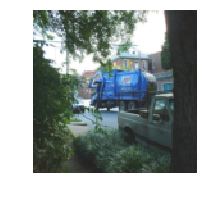

In [0]:
show_image(il[0])

In [0]:
il[0]

tensor([[[0.1843, 0.2118, 0.3176,  ..., 0.1686, 0.1647, 0.1647],
         [0.2039, 0.2157, 0.2902,  ..., 0.1647, 0.1569, 0.1647],
         [0.2196, 0.2510, 0.2431,  ..., 0.1569, 0.1529, 0.1608],
         ...,
         [0.2196, 0.2196, 0.1843,  ..., 0.1647, 0.1569, 0.1804],
         [0.1765, 0.2000, 0.2157,  ..., 0.1569, 0.1529, 0.1608],
         [0.1686, 0.1725, 0.2000,  ..., 0.1451, 0.1608, 0.1647]],

        [[0.2000, 0.2431, 0.3765,  ..., 0.1686, 0.1647, 0.1647],
         [0.2627, 0.2980, 0.3529,  ..., 0.1647, 0.1569, 0.1647],
         [0.2980, 0.3216, 0.2980,  ..., 0.1608, 0.1529, 0.1608],
         ...,
         [0.2353, 0.2275, 0.2039,  ..., 0.1686, 0.1569, 0.1765],
         [0.1765, 0.2000, 0.2157,  ..., 0.1647, 0.1569, 0.1647],
         [0.1686, 0.1725, 0.1882,  ..., 0.1529, 0.1725, 0.1804]],

        [[0.1490, 0.1686, 0.3922,  ..., 0.1569, 0.1608, 0.1725],
         [0.1686, 0.2039, 0.3569,  ..., 0.1647, 0.1569, 0.1725],
         [0.2235, 0.2549, 0.2549,  ..., 0.1608, 0.1569, 0.

In [0]:
il.items[0]

PosixPath('/root/.fastai/data/imagenette/train/n03417042/n03417042_3171.JPEG')

Some side note here: if we index into a ImageList directly, it will return the `tensor` of the image. However, if we call ImageList.Items[ ] and index into it, the path to the image will be returned. <br>
`PIL.image.open` accepts a path to open the image. Hence, the example below

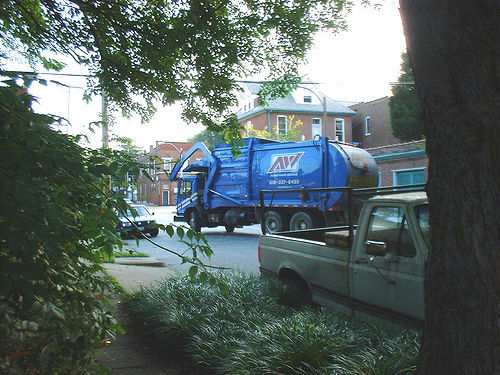

In [0]:
img = PIL.Image.open(il.items[0])
img

In [0]:
img.getbbox()

(0, 0, 500, 375)

In [0]:
# Returns the pixel value at a given position.
# :param xy: The coordinate, given as (x, y).
img.getpixel((1,1))

# returns: RGB

(43, 45, 34)

In [0]:
import numpy as np

In [0]:
%timeit -n 10 a = np.array(PIL.Image.open(il.items[0]))

10 loops, best of 3: 4.23 ms per loop


Be careful with resampling methods as we might quickly lose some textures

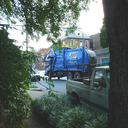

In [0]:
# ANTIALIAS is a good method to use when down-sampling(going from big to small)
img.resize((128,128), resample=PIL.Image.ANTIALIAS)

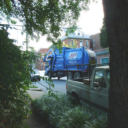

In [0]:
# THe most common
img.resize((128,128), resample=PIL.Image.BILINEAR)

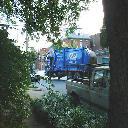

In [0]:
# Nearest neighbours
img.resize((128,128), resample=PIL.Image.NEAREST)

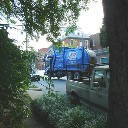

In [0]:
img.resize((256,256), resample=PIL.Image.BICUBIC).resize((128,128), resample=PIL.Image.NEAREST)

# 11-Text Transfer learning

## Getting `data`

In [0]:
from nb_10b import *

In [0]:
path = datasets.untar_data(datasets.URLs.IMDB)

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/test')]

We define a subclass ofItemList that will read the texts in the corresponding filenames.

In [0]:
def read_file(fn):
  with open(fn, 'r', encoding= 'utf8') as f : return f.read()

class TextList(ItemList):
  @classmethod
  def from_files(cls, path, extensions='.txt', recurse=True, include=None, **kwargs):
    return cls(get_files(path, extensions, recurse=recurse, include=include), path, **kwargs)
  
  def get(self, i):
    if isinstance(i, Path): return read_file(i)
    return i

We will use data from train, test and unsuperivsed folders

In [0]:
il = TextList.from_files(path, include=['train','test','unsup'])

In [0]:
len(il.items)

100000

In [0]:
# take a peek at an example
txt = il[0]
txt

"I'm totally sure this is the worst movie i have ever seen in my whole life. And don't get me wrong, i love Diego Luna and the way he works and acts but this movie, the director, filmography, the history it self was pretty bad, and i was just waiting for it to end. I was with my girlfriend and we saw it together. We are both Argentines and she loves Latin films but she totally agrees with me. Don't lose time and money, don't even try this one! Love's a Bitch, Nine Queens , Cidade DE Deus if you wanna give south America/Latin America movies a try but this one wasn't supposed to be even filmed My vote was 1 because there's no 0 Salutes"

## For text classification, we will split by the grand parent folder as before, but for language modeling we take all the texts and just put 10% aside.

In [0]:
p = path/'train'

In [0]:
p.ls() 

[PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/pos')]

In [0]:
# randomly split our data with 10% being hold-off for Validation set
def random_splitter(fn, p_valid): return random.random() < p_valid

sd = SplitData.split_by_func(il, partial(random_splitter, p_valid=0.1))

In [0]:
# remember, we will get different result evertime we run the line above because of the random split
sd

SplitData
Train: TextList (89989 items)
[PosixPath('/root/.fastai/data/imdb/unsup/42350_0.txt'), PosixPath('/root/.fastai/data/imdb/unsup/32650_0.txt'), PosixPath('/root/.fastai/data/imdb/unsup/6165_0.txt'), PosixPath('/root/.fastai/data/imdb/unsup/10336_0.txt'), PosixPath('/root/.fastai/data/imdb/unsup/15295_0.txt'), PosixPath('/root/.fastai/data/imdb/unsup/38117_0.txt'), PosixPath('/root/.fastai/data/imdb/unsup/30278_0.txt'), PosixPath('/root/.fastai/data/imdb/unsup/674_0.txt'), PosixPath('/root/.fastai/data/imdb/unsup/14385_0.txt'), PosixPath('/root/.fastai/data/imdb/unsup/32251_0.txt')...]
Path: /root/.fastai/data/imdb
Valid: TextList (10011 items)
[PosixPath('/root/.fastai/data/imdb/unsup/44649_0.txt'), PosixPath('/root/.fastai/data/imdb/unsup/3318_0.txt'), PosixPath('/root/.fastai/data/imdb/unsup/36438_0.txt'), PosixPath('/root/.fastai/data/imdb/unsup/23779_0.txt'), PosixPath('/root/.fastai/data/imdb/unsup/37229_0.txt'), PosixPath('/root/.fastai/data/imdb/unsup/3308_0.txt'), Posi

## Tokenizing

We need to tokenize the dataset first, which is splitting a sentence in to individual tokens.<br>
The library FastAI prefers is the same with Dr.Dipanjan. <br>
We will be using [`spacy`](https://spacy.io/) here

In [0]:
import spacy, html

Before even tokenizing, we will apply a bit of preprocessing on the texts to clean them up. <br>
These rules are applied before we split the sentences in tokens

In [0]:
# These rules are applied before we split the sentences in tokens
# Special tokens
UNK, PAD, BOS, EOS, TK_REP, TK_WREP, TK_UP, TK_MAJ = "xxunk xxpad xxbos xxeos xxrep xxwrep xxup xxmaj".split()
def sub_br(t):
    "Replaces the <br /> by \n"
    re_br = re.compile(r'<\s*br\s*/?>', re.IGNORECASE)
    return re_br.sub("\n", t)

def spec_add_spaces(t):
    "Add spaces around / and #"
    return re.sub(r'([/#])', r' \1 ', t)

def rm_useless_spaces(t):
    "Remove multiple spaces"
    return re.sub(' {2,}', ' ', t)

def replace_rep(t):
    "Replace repetitions at the character level: cccc -> TK_REP 4 c"
    def _replace_rep(m:Collection[str]) -> str:
        c,cc = m.groups()
        return f' {TK_REP} {len(cc)+1} {c} '
    re_rep = re.compile(r'(\S)(\1{3,})')
    return re_rep.sub(_replace_rep, t)
    
def replace_wrep(t):
    "Replace word repetitions: word word word -> TK_WREP 3 word"
    def _replace_wrep(m:Collection[str]) -> str:
        c,cc = m.groups()
        return f' {TK_WREP} {len(cc.split())+1} {c} '
    re_wrep = re.compile(r'(\b\w+\W+)(\1{3,})')
    return re_wrep.sub(_replace_wrep, t)

def fixup_text(x):
    "Various messy things we've seen in documents"
    re1 = re.compile(r'  +')
    x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>',UNK).replace(' @.@ ','.').replace(
        ' @-@ ','-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x))
    
default_pre_rules = [fixup_text, replace_rep, replace_wrep, spec_add_spaces, rm_useless_spaces, sub_br]
default_spec_tok = [UNK, PAD, BOS, EOS, TK_REP, TK_WREP, TK_UP, TK_MAJ]

In [0]:
replace_rep('dddddd')

' xxrep 6 d '

In [0]:
# works on minimum of 4 repeated charactors
replace_rep('ddd')

'ddd'

In [0]:
replace_wrep('sup sup sup sup ')

' xxwrep 4 sup  '

In [0]:
# works on minimum of 3 repeated words
replace_wrep('sup sup sup ')

'sup sup sup '

These rules are applied after the tokenization on the list of tokens.

In [0]:
# These rules are applied after the tokenization on the list of tokens.
def replace_all_caps(x):
  "Replace token in ALL CAPS by their lower version and add 'TK_UP' before"
  res = []
  for t in x:
    if t.isupper() and len(t) > 1: res.append(TK_UP); res.append(t.lower())
    else: res.append(t)
  return res

def deal_caps(x):
  "Replace all capitalized tokens in by their lower version and add 'TK_MAJ' before"
  res = []
  for t in x:
    if t == '': continue
    if t[0].isupper() and len(t) > 1 and t[1:].islower(): res.append(TK_MAJ)
    res.append(t.lower())
  return res

def add_eos_bos(x): return [BOS] + x + [EOS]

default_post_rules = [deal_caps, replace_all_caps, add_eos_bos]

In [0]:
t = 'TAKE'
t.isupper()

True

In [0]:
t = 'TakE'
t.isupper()

False

In [0]:
t[0].isupper()

True

In [0]:
# one-letter-word (I) will be skipped
replace_all_caps(['I','AM','SHOUTING'])

['I', 'xxup', 'am', 'xxup', 'shouting']

In [0]:
deal_caps(['My','name','is','Sylar'])

['xxmaj', 'my', 'name', 'is', 'xxmaj', 'sylar']

Since tokenizing and applying those rules take a bit of time, we will parallelize it using `processPollExecuotr` to go faster

In [0]:
#export
from spacy.symbols import ORTH
from concurrent.futures import ProcessPoolExecutor

def parallel(func, arr, max_workers=4):
    if max_workers<2: results = list(progress_bar(map(func, enumerate(arr)), total=len(arr)))
    else:
        with ProcessPoolExecutor(max_workers=max_workers) as ex:
            return list(progress_bar(ex.map(func, enumerate(arr)), total=len(arr)))
    if any([o is not None for o in results]): return results

In [0]:
class TokenizeProcessor(Processor):
  def __init__(self, lang='en', chunksize=2000, pre_rules=None, post_rules=None, max_workers=4):
    self.chunksize, self.max_workers = chunksize, max_workers
    self.tokenizer = spacy.blank(lang).tokenizer
    for w in default_spec_tok:
      self.tokenizer.add_special_case(w, [{ORTH: w}])
    self.pre_rules = default_pre_rules   if pre_rules  is None else pre_rules
    self.post_rules = default_post_rules if post_rules is None else post_rules

  def proc_chunk(self, args):
    i, chunk = args
    chunk = [compose(t, self.pre_rules) for t in chunk]
    docs  = [[d.text for d in doc] for doc in self.tokenizer.pipe(chunk)]
    docs  = [compose(t, self.post_rules) for t in docs]
    return docs

  def __call__(self, items):
    toks = []
    if isinstance(items[0], Path): items = [read_file(i) for i in items]
    chunks = [items[i:i+self.chunksize] for i in range(0, len(items), self.chunksize)]
    toks = parallel(self.proc_chunk, chunks, max_workers = self.max_workers)
    return sum(toks, [])

  def proc1(self, item): return self.proc_chunk([item])[0]

  def deprocess(self, toks): return [self.deproc1(tok) for tok in toks]
  def deproc1(self, tok): return " ".join(tok)

In [0]:
tp = TokenizeProcessor()

In [0]:
txt[:250]

"I'm totally sure this is the worst movie i have ever seen in my whole life. And don't get me wrong, i love Diego Luna and the way he works and acts but this movie, the director, filmography, the history it self was pretty bad, and i was just waiting "

In [0]:
'*'.join(tp(il[:10])[0])[:400]

"xxbos*i*'m*totally*sure*this*is*the*worst*movie*i*have*ever*seen*in*my*whole*life*.*xxmaj*and*do*n't*get*me*wrong*,*i*love*xxmaj*diego*xxmaj*luna*and*the*way*he*works*and*acts*but*this*movie*,*the*director*,*filmography*,*the*history*it*self*was*pretty*bad*,*and*i*was*just*waiting*for*it*to*end*.*i*was*with*my*girlfriend*and*we*saw*it*together*.*xxmaj*we*are*both*xxmaj*argentines*and*she*loves*xxm"

## Numericalizing

Once we have tokenized our texts, we replace each token by an individual number, this is called **numericalizing**. Again, we do this with a processor(not so different from the `CategoryProcessor`)

In [0]:
#export
import collections

class NumericalizeProcessor(Processor):
    def __init__(self, vocab=None, max_vocab=60000, min_freq=2): 
        self.vocab,self.max_vocab,self.min_freq = vocab,max_vocab,min_freq
    
    def __call__(self, items):
        #The vocab is defined on the first use.
        if self.vocab is None:
            freq = Counter(p for o in items for p in o)
            self.vocab = [o for o,c in freq.most_common(self.max_vocab) if c >= self.min_freq]
            for o in reversed(default_spec_tok):
                if o in self.vocab: self.vocab.remove(o)
                self.vocab.insert(0, o)
        if getattr(self, 'otoi', None) is None:
            self.otoi = collections.defaultdict(int,{v:k for k,v in enumerate(self.vocab)}) 
        return [self.proc1(o) for o in items]
    def proc1(self, item):  return [self.otoi[o] for o in item]
    
    def deprocess(self, idxs):
        assert self.vocab is not None
        return [self.deproc1(idx) for idx in idxs]
    def deproc1(self, idx): return [self.vocab[i] for i in idx]

In [0]:
c = Counter('abcbcbcbcaacccccc')
c.most_common

<bound method Counter.most_common of Counter({'c': 10, 'b': 4, 'a': 3})>

In [0]:
c['c']

10

In [0]:
default_spec_tok

['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxrep', 'xxwrep', 'xxup', 'xxmaj']

In [0]:
print( [i for i in reversed(default_spec_tok)])

['xxmaj', 'xxup', 'xxwrep', 'xxrep', 'xxeos', 'xxbos', 'xxpad', 'xxunk']


When we do language modeling, we will infer the labels from the text during training, so there's no need to label.<br> 
The training loop expects labels however, so we need to add dummy ones.

In [0]:
proc_tok, proc_num = TokenizeProcessor(max_workers=8), NumericalizeProcessor()

In [0]:
%time ll = label_by_func(sd, lambda x: 0, proc_x=[proc_tok, proc_num])

CPU times: user 26.8 s, sys: 4.01 s, total: 30.9 s
Wall time: 4min 23s


Once the items have been processed they will become list of numbers, we can still access the underlying raw data in `x_obj` (or `y-obj` for the the targets, but we don't have any here)

In [0]:
ll.train.x_obj(0)

"xxbos i 'm totally sure this is the worst movie i have ever seen in my whole life . xxmaj and do n't get me wrong , i love xxmaj diego xxmaj luna and the way he works and acts but this movie , the director , filmography , the history it self was pretty bad , and i was just waiting for it to end . i was with my girlfriend and we saw it together . xxmaj we are both xxmaj xxunk and she loves xxmaj latin films but she totally agrees with me . xxmaj do n't lose time and money , do n't even try this one ! xxmaj love 's a xxmaj bitch , xxmaj nine xxmaj queens , xxmaj cidade de xxmaj deus if you wanna give south xxmaj america / xxmaj latin xxmaj america movies a try but this one was n't supposed to be even filmed xxmaj my vote was 1 because there 's no 0 xxmaj salutes xxeos"

In [0]:
ll.train

LabeledData
x: TextList (89989 items)
[[2, 18, 167, 482, 272, 19, 15, 8, 270, 29, 18, 41, 144, 131, 17, 77, 239, 136, 9, 7, 11, 58, 35, 98, 88, 375, 10, 18, 133, 7, 9207, 7, 13717, 11, 8, 116, 39, 536, 11, 1385, 30, 19, 29, 10, 8, 170, 10, 7917, 10, 8, 495, 16, 554, 25, 206, 97, 10, 11, 18, 25, 57, 1059, 28, 16, 14, 148, 9, 18, 25, 27, 77, 972, 11, 90, 235, 16, 310, 9, 7, 90, 38, 218, 7, 0, 11, 71, 1287, 7, 4982, 124, 30, 71, 482, 4336, 27, 88, 9, 7, 58, 35, 1635, 75, 11, 305, 10, 58, 35, 76, 372, 19, 42, 50, 7, 133, 22, 12, 7, 4983, 10, 7, 2840, 7, 6737, 10, 7, 29191, 825, 7, 11617, 63, 32, 2894, 220, 1254, 7, 798, 125, 7, 4982, 7, 798, 118, 12, 372, 30, 19, 42, 25, 35, 457, 14, 43, 76, 752, 7, 77, 1980, 25, 381, 107, 54, 22, 74, 2767, 7, 33342, 3], [2, 7, 14496, 7, 28369, 7, 0, 36, 276, 47, 7, 12160, 7, 3013, 33, 85, 12, 191, 171, 401, 17, 8, 29, 36, 2311, 644, 2701, 8, 1052, 7, 713, 16279, 17, 7, 2340, 33, 10, 30, 8, 29, 240, 178, 30, 370, 644, 28, 8, 464, 29, 9, 7, 19, 456, 13, 470

## Batching

To conver our `LabelList` to a `DataBunch`, we need to solve the issue that batching IMDb reviews with different length. We want to stream through all the texts concatenated. We also have to prepare the targets that are the newt words in the text. <br>
All of this is done with the next object called `LM_PreLoader`.<br>
At the beginning of each epoch, it will shuffle the articales(if `shuffle=True`) and create a big stream by concatenating all of them. We divide this big stream in `bs` smaller streams. That we will read in chunks of `bptt` length.

In [0]:
from IPython.display import display, HTML
import pandas as pd


Let's say our stream is:

In [0]:
stream = """
In this notebook, we will go back over the example of classifying movie reviews we studied in part 1 and dig deeper under the surface. 
First we will look at the processing steps necessary to convert text into numbers and how to customize it. By doing this, we'll have another example of the Processor used in the data block API.
Then we will study how we build a language model and train it.\n
"""
tokens = np.array(tp([stream])[0])

Then if we split it in 6 batches it would give something like this:

In [0]:
bs, seq_len = 6, 15
d_tokens = np.array([tokens[i*seq_len: (i+1)*seq_len] for i in range(bs)])
df = pd.DataFrame(d_tokens)
display(HTML(df.to_html(index=False,header=None)))

xxbos,\n,xxmaj,in,this,notebook,",",we,will,go,back,over,the,example,of
classifying,movie,reviews,we,studied,in,part,1,and,dig,deeper,under,the,surface,.
\n,xxmaj,first,we,will,look,at,the,processing,steps,necessary,to,convert,text,into
numbers,and,how,to,customize,it,.,xxmaj,by,doing,this,",",we,'ll,have
another,example,of,the,xxmaj,processor,used,in,the,data,block,api,.,\n,xxmaj
then,we,will,study,how,we,build,a,language,model,and,train,it,.,\n\n


Then if we have a `bptt` of 5, we would go over those in **three** batches. (`df.shape[1]/bptt`)

In [0]:
bs, bptt = 6,5
for k in range(int(df.shape[1]/bptt)):
  d_tokens = np.array([tokens[i*seq_len + k*bptt:i*seq_len + (k+1)*bptt] for i in range(bs)])
  df = pd.DataFrame(d_tokens)
  display(HTML(df.to_html(index=False, header=None)))

xxbos,\n,xxmaj,in,this
classifying,movie,reviews,we,studied
\n,xxmaj,first,we,will
numbers,and,how,to,customize
another,example,of,the,xxmaj
then,we,will,study,how


notebook,",",we,will,go
in,part,1,and,dig
look,at,the,processing,steps
it,.,xxmaj,by,doing
processor,used,in,the,data
we,build,a,language,model


back,over,the,example,of
deeper,under,the,surface,.
necessary,to,convert,text,into
this,",",we,'ll,have
block,api,.,\n,xxmaj
and,train,it,.,\n\n


In [0]:
df.shape

(6, 15)

In [0]:
class LM_PreLoader():
    def __init__(self, data, bs=64, bptt=70, shuffle=False):
        self.data,self.bs,self.bptt,self.shuffle = data,bs,bptt,shuffle
        total_len = sum([len(t) for t in data.x])
        self.n_batch = total_len // bs
        self.batchify()
    
    def __len__(self): return ((self.n_batch-1) // self.bptt) * self.bs
    
    def __getitem__(self, idx):
        source = self.batched_data[idx % self.bs]
        seq_idx = (idx // self.bs) * self.bptt
        return source[seq_idx:seq_idx+self.bptt],source[seq_idx+1:seq_idx+self.bptt+1]
    
    def batchify(self):
        texts = self.data.x
        if self.shuffle: texts = texts[torch.randperm(len(texts))]
        stream = torch.cat([tensor(t) for t in texts])
        self.batched_data = stream[:self.n_batch * self.bs].view(self.bs, self.n_batch)

In [0]:
15//4

3

In [0]:
15 % 2

1

In [0]:
dl = DataLoader(LM_PreLoader(ll.valid, shuffle=True), batch_size=64)

Let's check it all workds ok:
* x1, y1, x1 and y2 should all be of size `bs` by `bptt`. 
* The texts in each row of x1 should continue in x2.
* y1 and y2 should have the same texts as their x counterpart, shifted of one position to the right

In [0]:
iter_dl = iter(dl)
x1, y1 = next(iter_dl)
x2, y2 = next(iter_dl)

In [0]:
x1.size(), y1.size()

(torch.Size([64, 70]), torch.Size([64, 70]))

In [0]:
vocab = proc_num.vocab

In [0]:
" ".join(vocab[o] for o in x1[0])

'xxbos i have been a fan of xxmaj will xxmaj smith for years and i have to say this may be his best film yet ! " xxmaj the xxmaj pursuit of xxmaj happiness " is just a wonderful ( based on a true ) story , full of adventure , hope , and pain . i saw the movie last night in a packed theater . xxmaj big xxmaj'

In [0]:
# check if it's shifted by 1 place from x1
" ".join(vocab[o] for o in y1[0])

'i have been a fan of xxmaj will xxmaj smith for years and i have to say this may be his best film yet ! " xxmaj the xxmaj pursuit of xxmaj happiness " is just a wonderful ( based on a true ) story , full of adventure , hope , and pain . i saw the movie last night in a packed theater . xxmaj big xxmaj willie'

In [0]:
" ".join(vocab[o] for o in x2[0])

"willie xxmaj weekend has returned , and for good reason ! xxmaj it 's a great movie to see during the holidays and definitely a tear - jerker ! xxmaj perfect for a date , a night out with friends , or even with family . xxmaj if you ever thought xxmaj will xxmaj smith really could n't act ( and shame on you ! ) , you 'll think"

In [0]:
# some vonvenient functions to quickly do the above
def get_lm_dls(train_ds, valid_ds, bs, bptt, **kwargs):
    return (DataLoader(LM_PreLoader(train_ds, bs, bptt, shuffle=True), batch_size=bs, **kwargs),
            DataLoader(LM_PreLoader(valid_ds, bs, bptt, shuffle=False), batch_size=2*bs, **kwargs))

def lm_databunchify(sd, bs, bptt, **kwargs):
    return DataBunch(*get_lm_dls(sd.train, sd.valid, bs, bptt, **kwargs))

In [0]:
bs,bptt = 64,70
data = lm_databunchify(ll, bs, bptt)

## Batching for classification

When we will want to tackle classification, gathering the data will be a bit different: 
* First we will label our texts with the folder they come from, and then we will need to apply padding to batch them together. 
* To avoid mixing very long texts with very short ones (so there won't carzy amount of useless padding), we will also use `Sampler` to sort our samples by length